In [ ]:
model = torch.load(model_path)
model['hyper_parameters']['autoencoder_checkpoint'] = '/home/john/PhD/BISCUIT/pretrained_models/AE_gridworld_simplified/AE_40l_64hid.ckpt'
torch.save(model, model_path)

In [1]:
from models.biscuit_nf import BISCUITNF
import torch
from typing import List, Tuple, Dict, Any, Union, Optional
device = 'cuda' if torch.cuda.is_available() else 'cpu'

autoencoder_path = '/home/john/PhD/BISCUIT/pretrained_moels/AE_gridworld_simplified/AE_20l_64hid.ckpt'
model_path = '/home/john/PhD/BISCUIT/pretrained_models/AE_gridworld_simplified/NF_text_only_cardinal.ckpt'
model = BISCUITNF.load_from_checkpoint(model_path, autoencoder_path=autoencoder_path)
model.to(device)
model.freeze()
_ = model.eval()



/home/john/miniconda3/envs/biscuit/lib/python3.11/site-packages/pytorch_lightning/utilities/migration/utils.py:55: PossibleUserWarning: The loaded checkpoint was produced with Lightning v2.1.0, which is newer than your current Lightning version: v2.0.9.post0
  rank_zero_warn(
/home/john/miniconda3/envs/biscuit/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [ ]:
import torch
encs_path = '/home/john/PhD/BISCUIT/pretrained_models/AE_gridworld_simplified/encodings/gridworld_simplified_5c_test_indep.pt'
encs_path_drop_last_frame = '/home/john/PhD/BISCUIT/pretrained_models/AE_gridworld_simplified/encodings/gridworld_simplified_5c_drop_last_frame_test_indep.pt'
t = torch.load(encs_path)
t1 = torch.load(encs_path_drop_last_frame)


In [ ]:
from matplotlib import pyplot as plt
for i in range(50):
    print(i)
    img1 = t1[i]
    img2 = t[i]
    print(img1)
    print(img2)
    img1 = model.autoencoder.decoder(torch.from_numpy(img1).to(device).unsqueeze(0))
    img1 = (img1 + 1) / 2
    img2 = model.autoencoder.decoder(torch.from_numpy(img2).to(device).unsqueeze(0))
    img2 = (img2 + 1) / 2
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(img1.squeeze().cpu().detach().numpy().transpose(1, 2, 0))
    ax[1].imshow(img2.squeeze().cpu().detach().numpy().transpose(1, 2, 0))
    plt.show()


In [ ]:
encodings_path = '/home/gkounto/BISCUIT/experiments/pretrained_models/AE_gridworld_small/encodings/gridworld_small_pre_intv_freeze_test.pt'
encodings = torch.load(encodings_path)

In [12]:
from experiments.datasets import GridworldDataset
data_folder = '/home/john/PhD/BISCUIT/data/gridworld_simplified_5c'
# val_seq_dataset = GridworldDataset(
# data_folder=data_folder, split='val', return_targets=True, return_robot_state=True, single_image=False, triplet=False, seq_len=2, cluster=False, return_text=False, subsample_percentage=0.01)
train_seq_dataset = GridworldDataset(
        data_folder=data_folder, split='train', return_targets=True, return_latents=True, single_image=False, triplet=False, seq_len=2, cluster=False, return_text=True, subsample_percentage=0.01)

100


Loading sequences of train:   0%|          | 0/100 [00:00<?, ?it/s]

In [13]:
train_seq_dataset[0]

(tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           ...,
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.]],
 
          [[-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           ...,
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.]],
 
          [[-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           ...,
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.]]],
 
 
         [[[-1., -1., -1.,  ..., -1., -1., -1.],
         

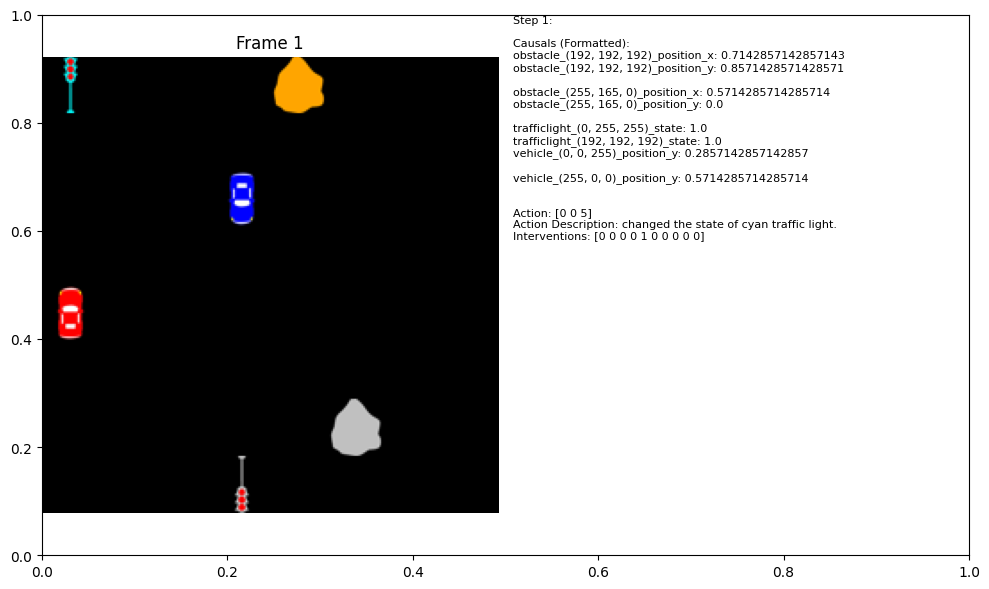

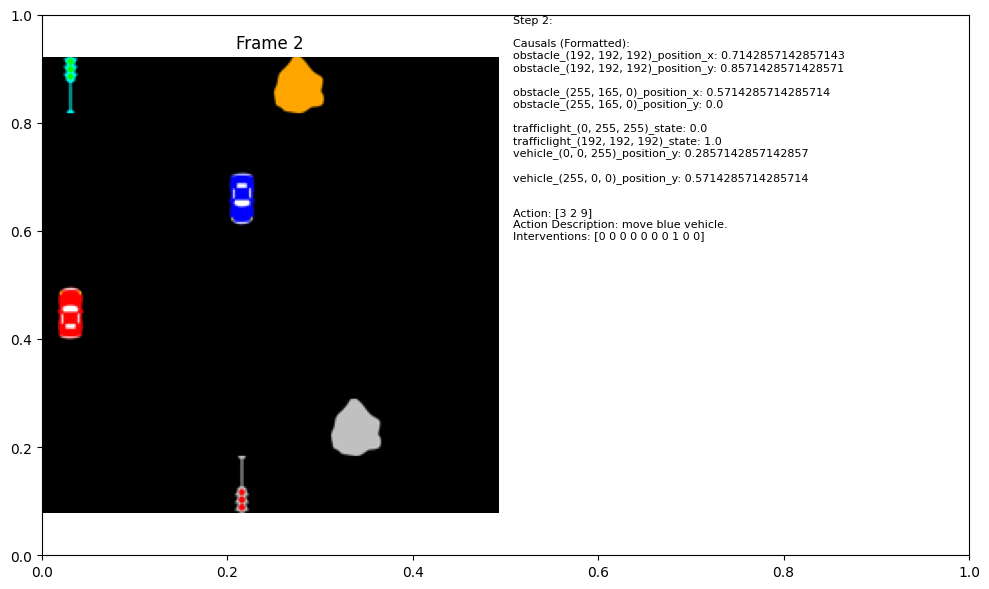

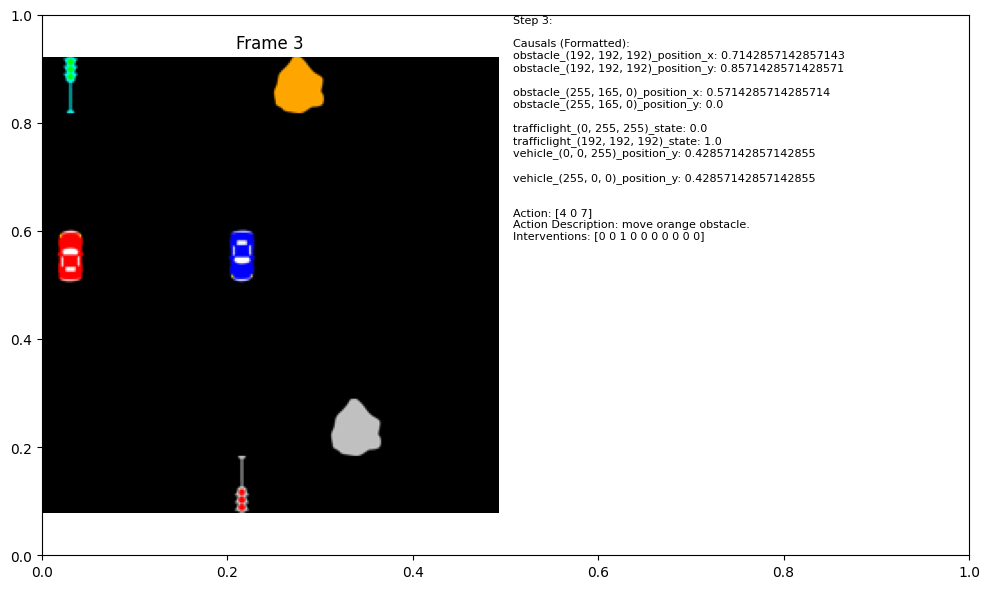

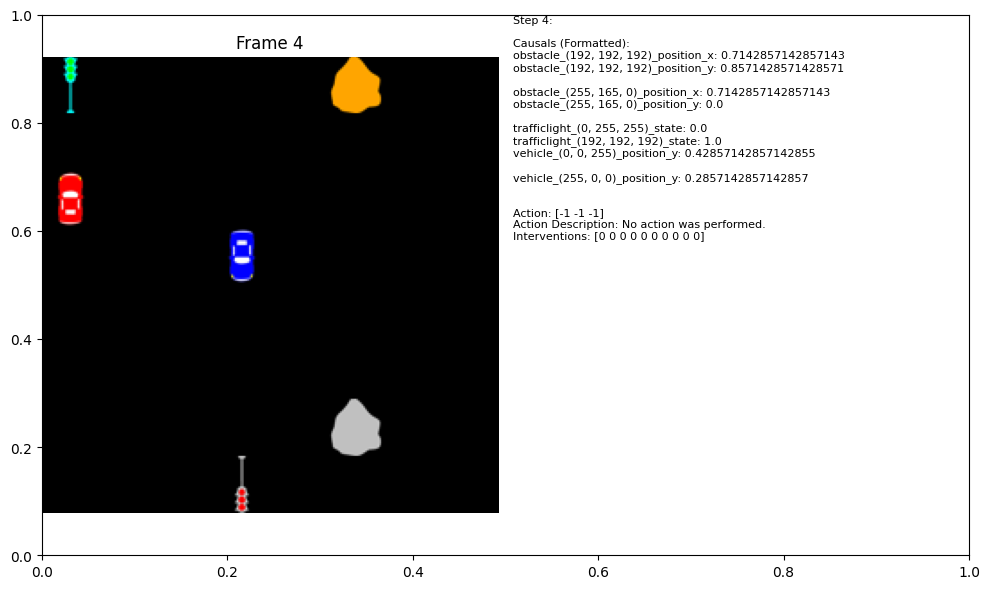

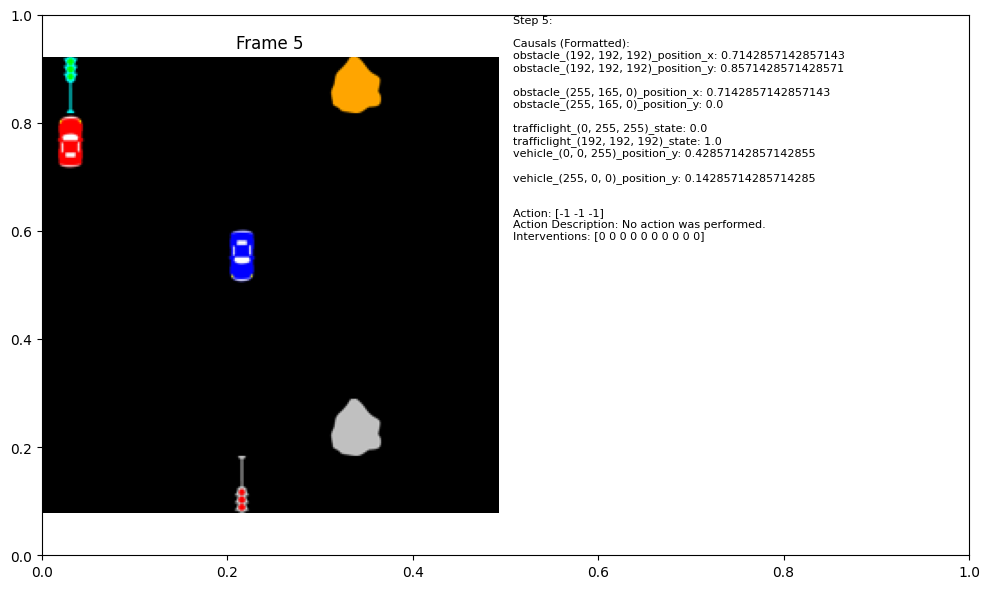

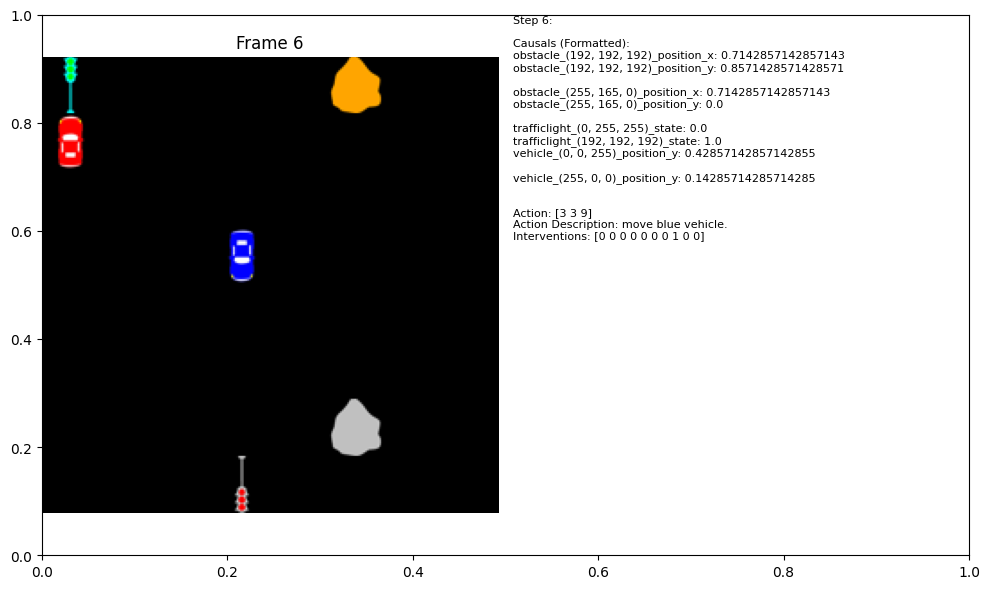

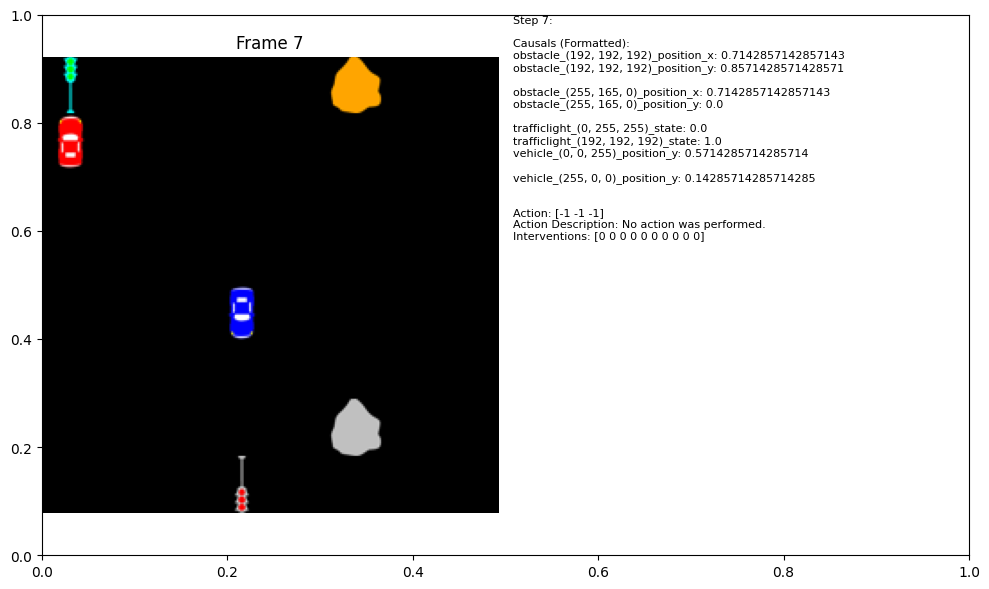

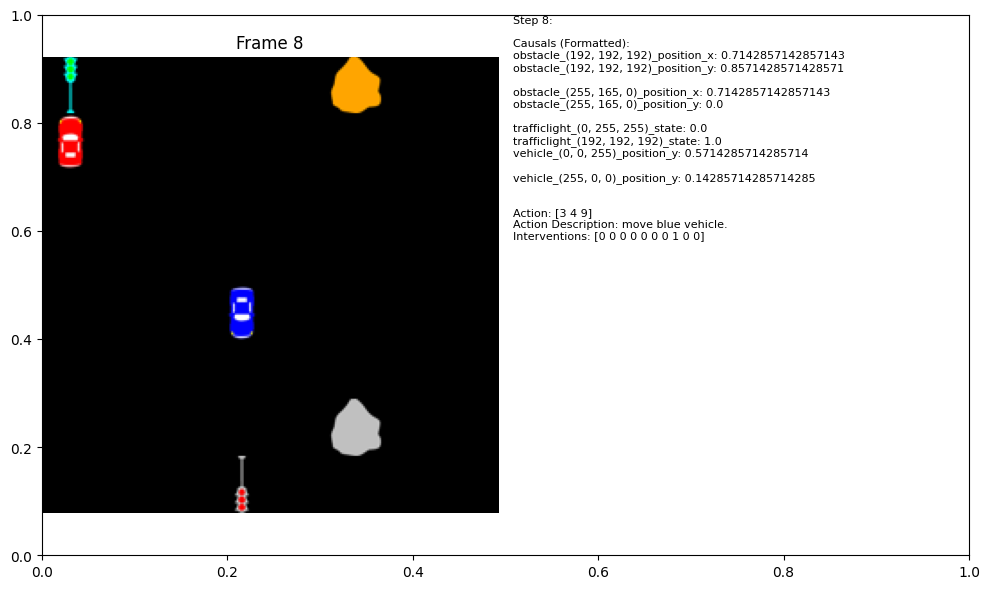

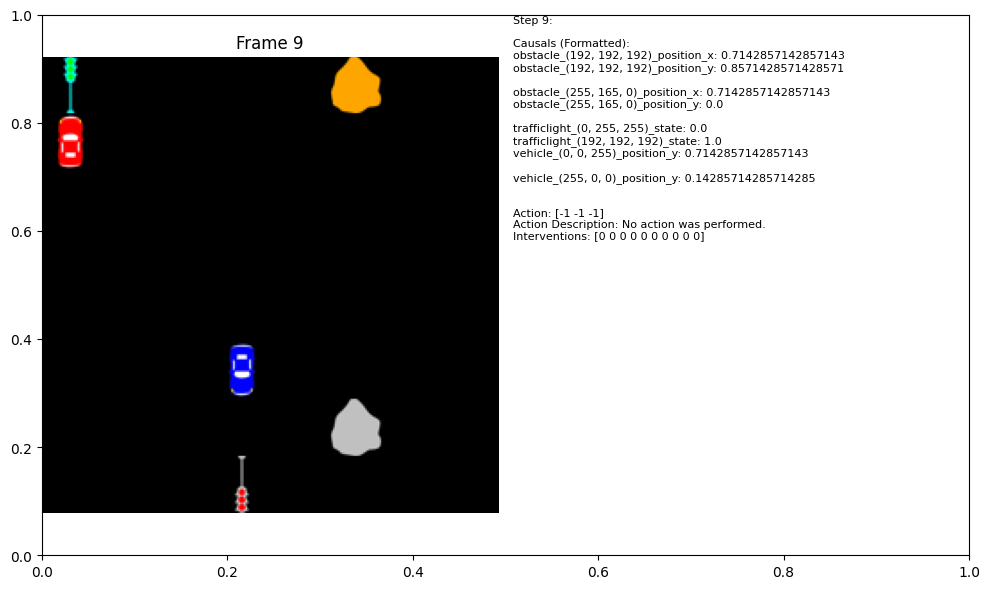

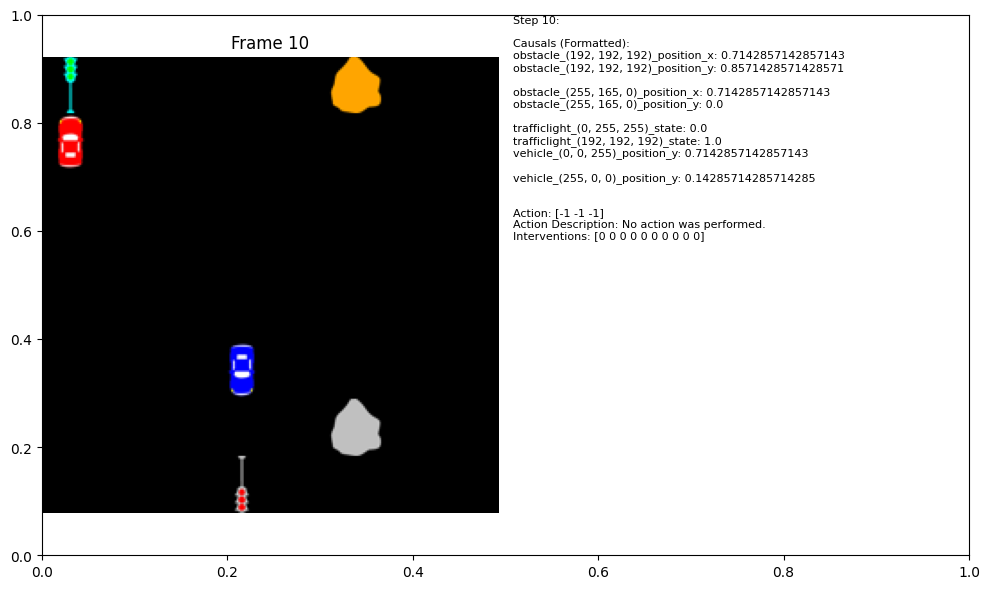

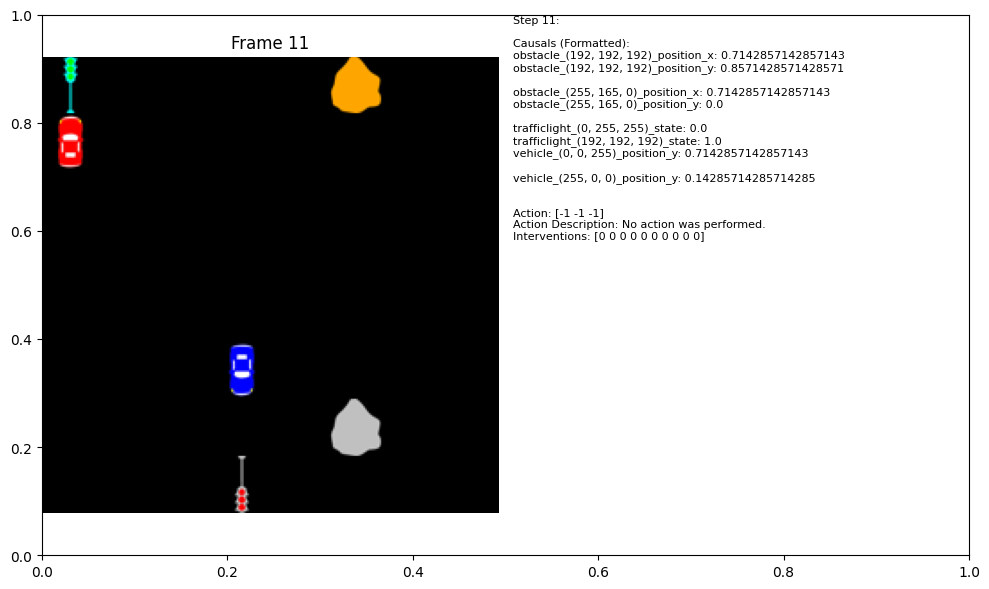

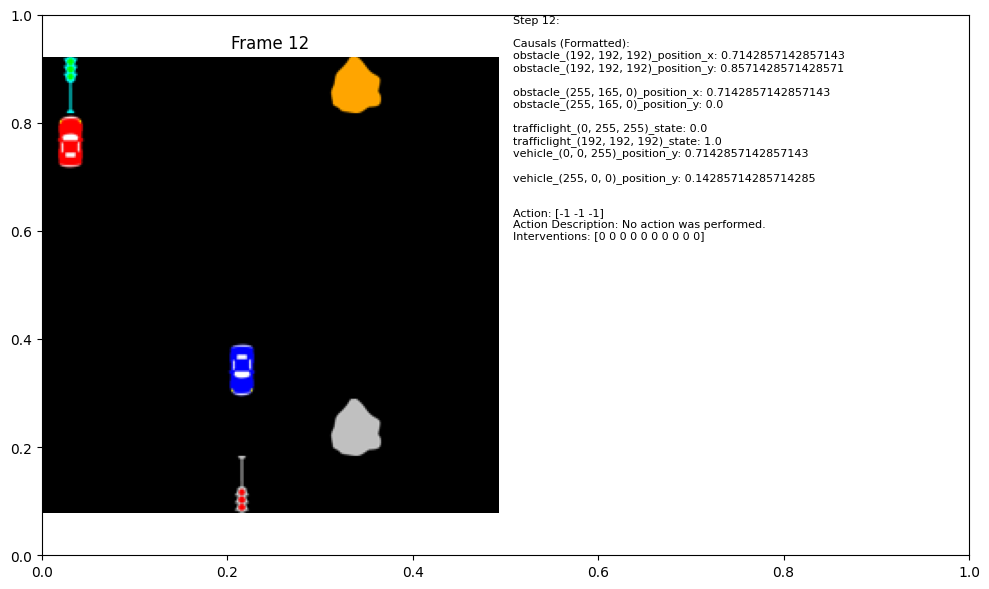

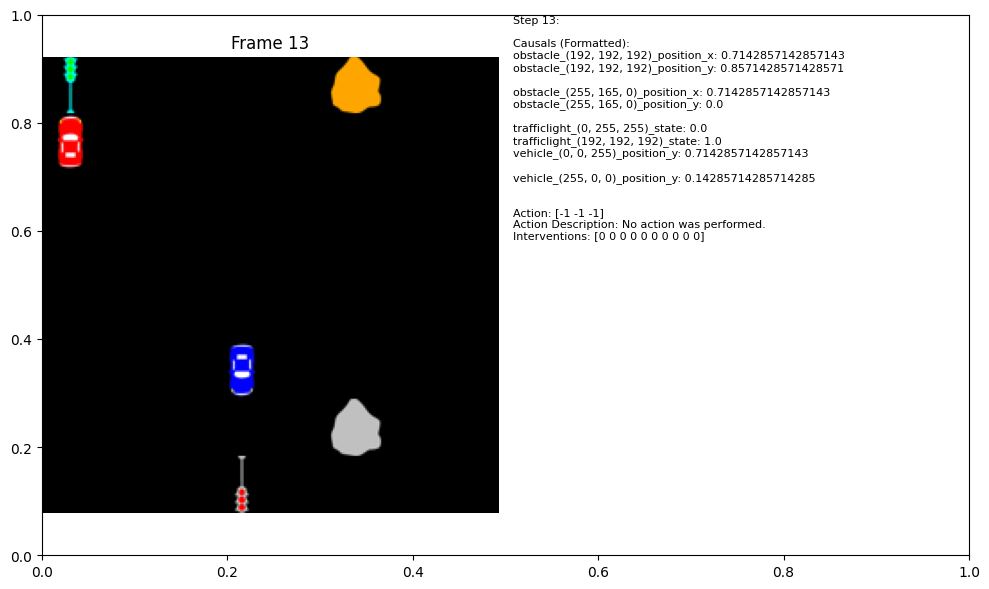

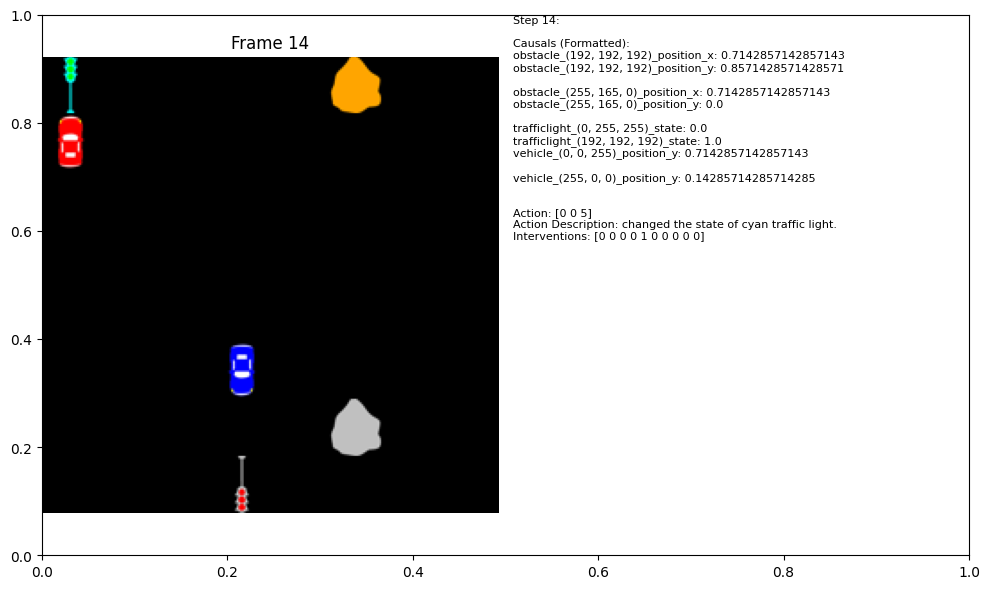

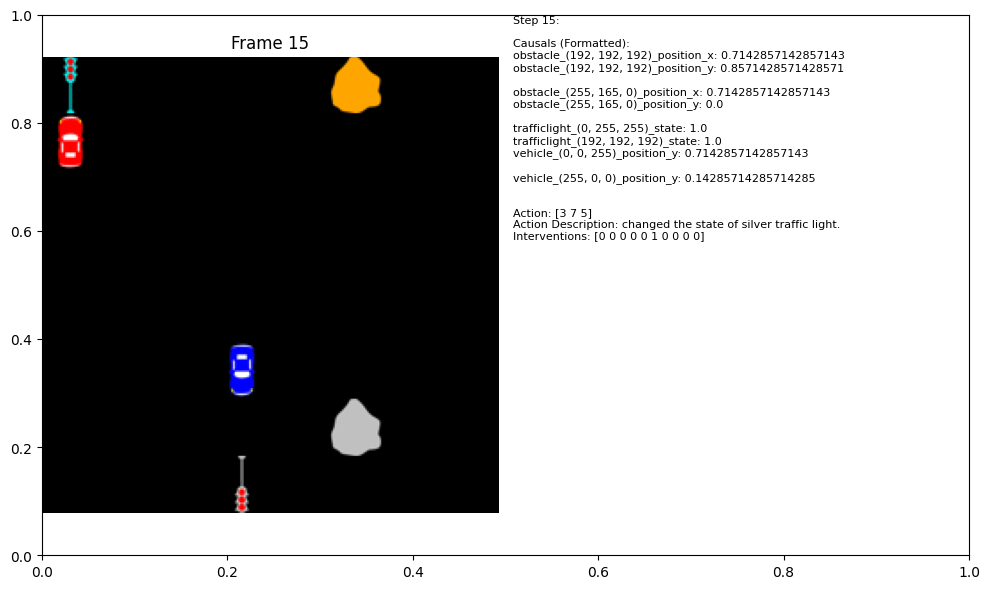

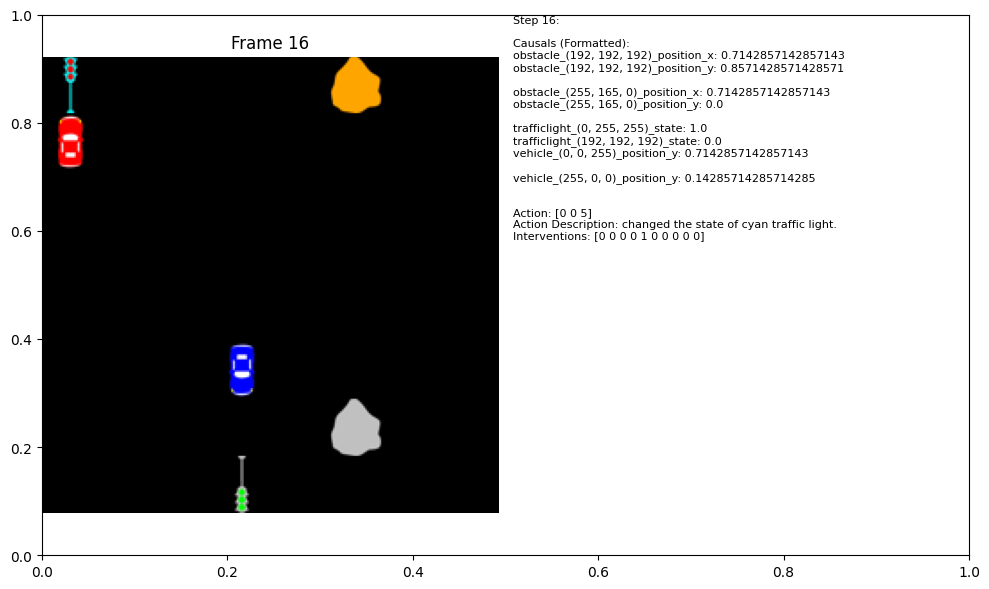

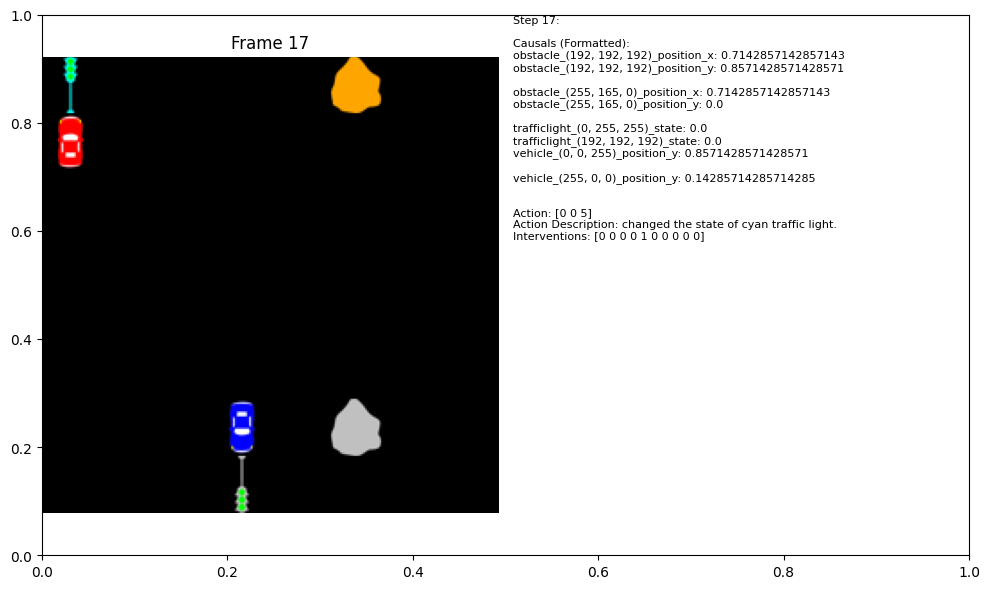

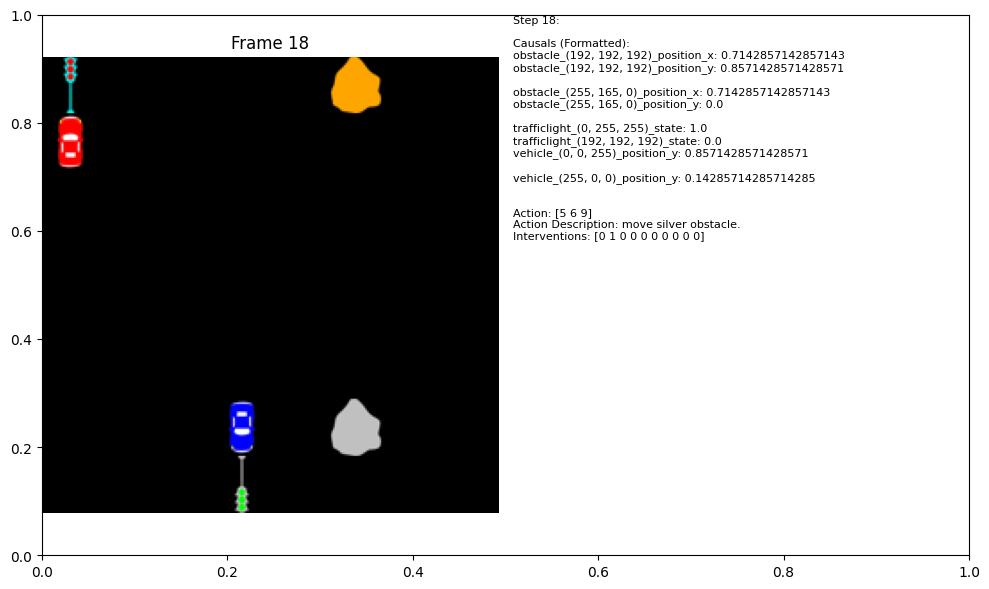

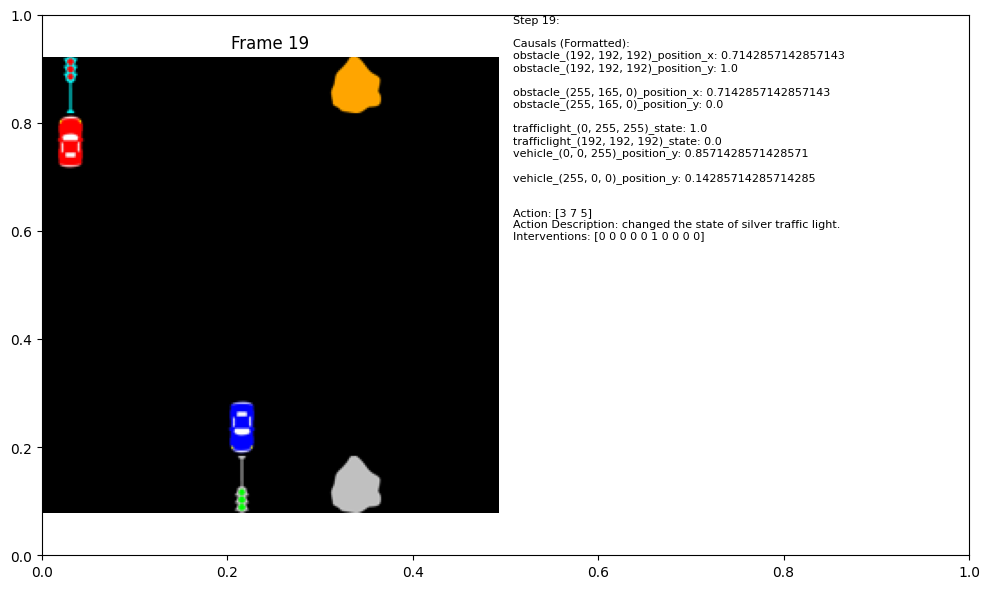

IndexError: index 19 is out of bounds for axis 0 with size 19

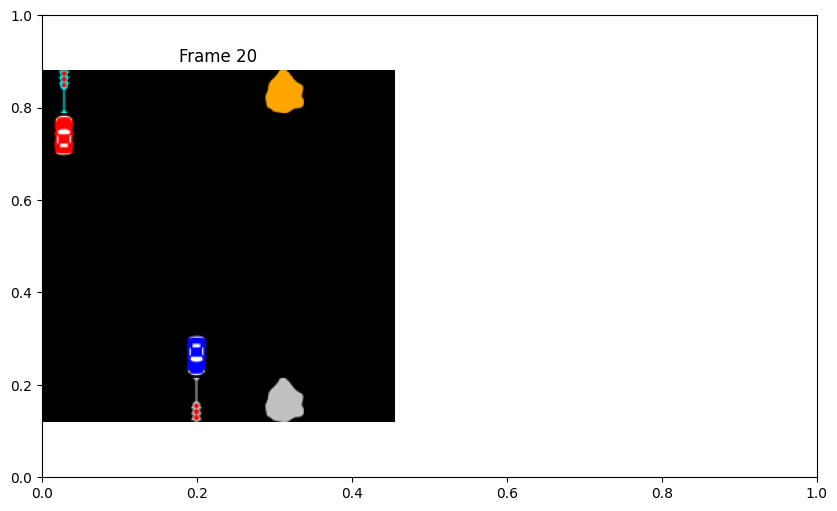

In [4]:
import numpy as np
import json
from data_generation.gridworld import Gridworld
from PIL import Image
import matplotlib.pyplot as plt

def format_causal_dict(causal_dict):
    formatted_text = ""
    for key, value in causal_dict.items():
        formatted_text += f"{key}: {value}\n"
        if "position_y" in key:  # Add a line break after each entity's details
            formatted_text += "\n"
    return formatted_text

def visualize_episode(frames, causals, causal_keys, actions, action_descriptions, interventions):
    for i in range(len(frames)):
        # debug_causals = Gridworld.causal_vector_to_debug_dict(causal_keys, causals[i])
        debug_causals = dict(zip(causal_keys, causals[i]))
        formatted_causals = format_causal_dict(debug_causals)

        fig, ax = plt.subplots(figsize=(10, 6))
        ax1 = plt.subplot(1, 2, 1)  # Frame subplot
        ax1.imshow(frames[i])
        ax1.set_title(f"Frame {i+1}")
        ax1.axis('off')

        ax2 = plt.subplot(1, 2, 2)  # Textual information subplot
        ax2.axis('off')
        text_info = (
            f"Step {i+1}:\n\n"
            f"Causals (Formatted):\n{formatted_causals}\n"
            f"Action: {actions[i]}\n"
            f"Action Description: {action_descriptions[i]}\n"
            f"Interventions: {interventions[i]}"
        )
        ax2.text(0, 1, text_info, ha='left', va='top', fontsize=8, wrap=True)

        plt.tight_layout()
        plt.show()

a = np.load('/home/john/PhD/BISCUIT/data_generation/data/gridworld_simplified_2c2b2l_noturn_noshufflecars/check/gridworld_episode_28.npz')
causal_keys = json.load(open('/home/john/PhD/BISCUIT/data_generation/data/gridworld_simplified_2c2b2l_noturn_noshufflecars/check_metadata.json'))['flattened_causals']
frames, causals, actions, interventions, action_descriptions = a['frames'], a['causals'], a['actions'], a['interventions'], a['action_descriptions']
visualize_episode(frames, causals, causal_keys, actions, action_descriptions, interventions)

{'obstacle_(255, 165, 0)_position_x': 0.7142857142857143, 'obstacle_(255, 165, 0)_position_y': 0.0, 'trafficlight_(0, 255, 255)_state': 1.0, 'trafficlight_(192, 192, 192)_state': 1.0, 'vehicle_(255, 0, 0)_position_y': 1.0}


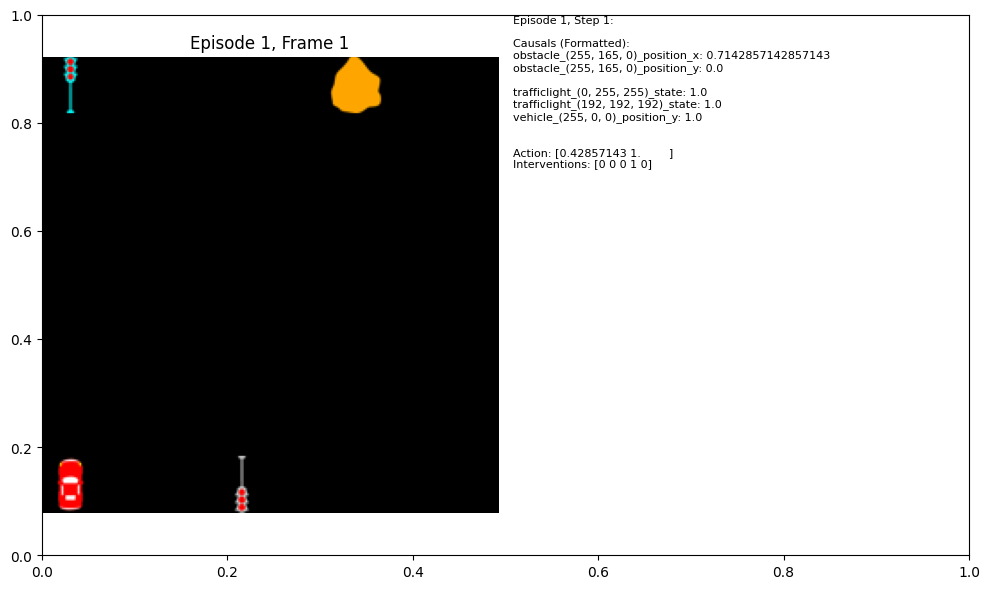

{'obstacle_(255, 165, 0)_position_x': 0.7142857142857143, 'obstacle_(255, 165, 0)_position_y': 0.0, 'trafficlight_(0, 255, 255)_state': 1.0, 'trafficlight_(192, 192, 192)_state': 0.0, 'vehicle_(255, 0, 0)_position_y': 1.0}


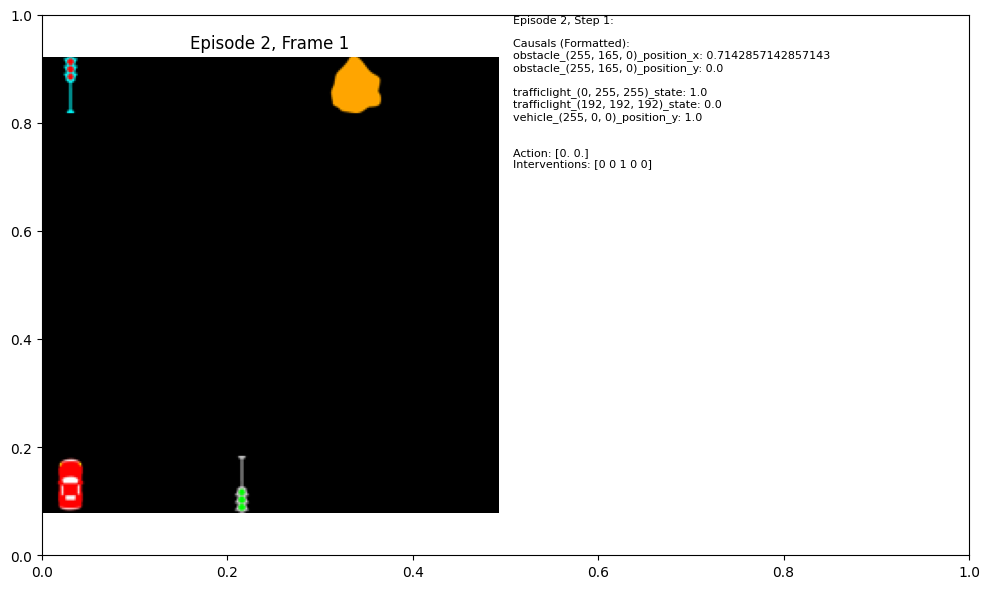

{'obstacle_(255, 165, 0)_position_x': 0.7142857142857143, 'obstacle_(255, 165, 0)_position_y': 0.0, 'trafficlight_(0, 255, 255)_state': 0.0, 'trafficlight_(192, 192, 192)_state': 0.0, 'vehicle_(255, 0, 0)_position_y': 1.0}


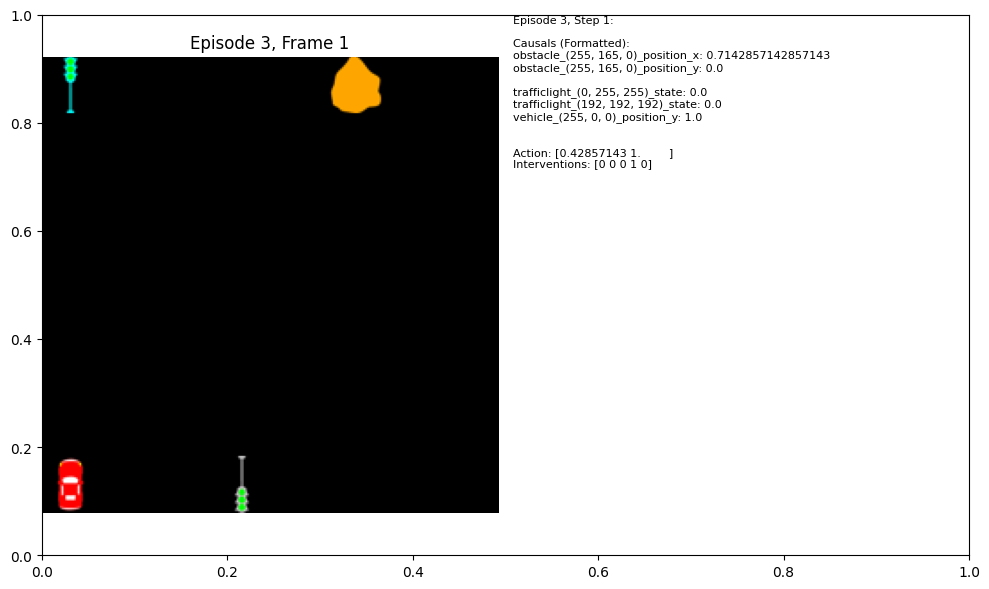

{'obstacle_(255, 165, 0)_position_x': 0.7142857142857143, 'obstacle_(255, 165, 0)_position_y': 0.0, 'trafficlight_(0, 255, 255)_state': 0.0, 'trafficlight_(192, 192, 192)_state': 1.0, 'vehicle_(255, 0, 0)_position_y': 0.8571428571428571}


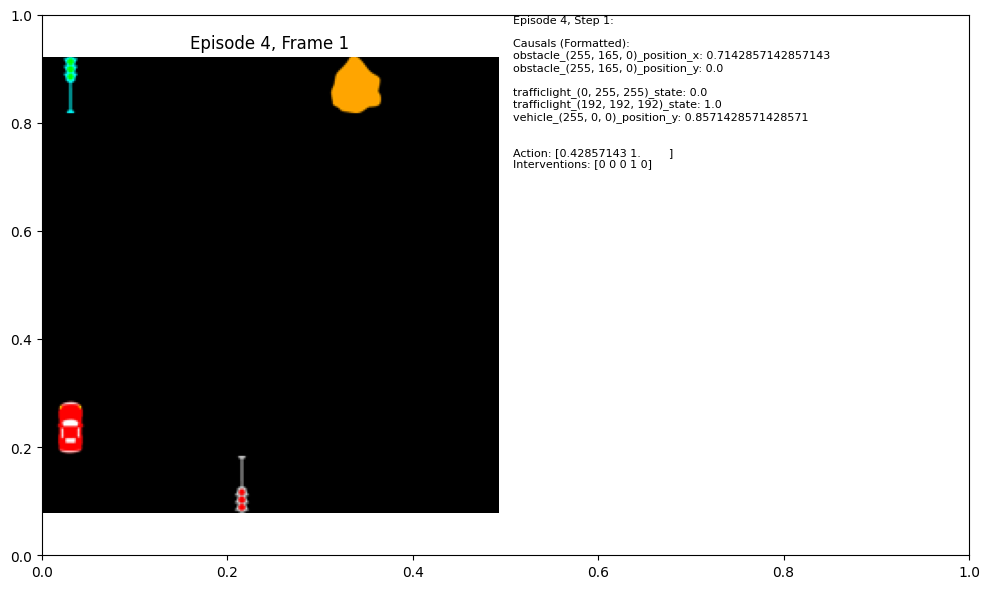

{'obstacle_(255, 165, 0)_position_x': 0.7142857142857143, 'obstacle_(255, 165, 0)_position_y': 0.0, 'trafficlight_(0, 255, 255)_state': 0.0, 'trafficlight_(192, 192, 192)_state': 0.0, 'vehicle_(255, 0, 0)_position_y': 0.7142857142857143}


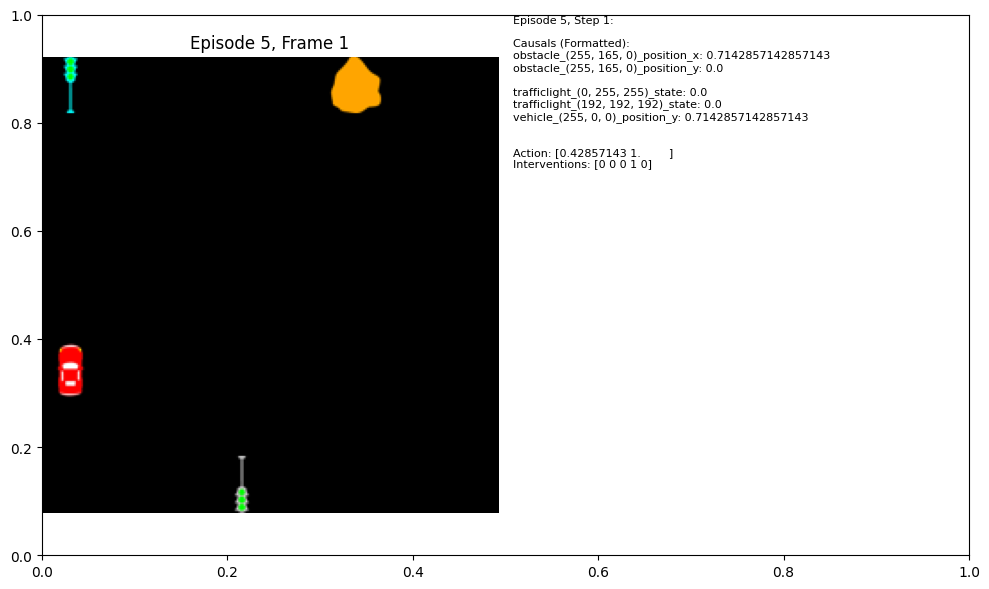

{'obstacle_(255, 165, 0)_position_x': 0.7142857142857143, 'obstacle_(255, 165, 0)_position_y': 0.0, 'trafficlight_(0, 255, 255)_state': 0.0, 'trafficlight_(192, 192, 192)_state': 1.0, 'vehicle_(255, 0, 0)_position_y': 0.5714285714285714}


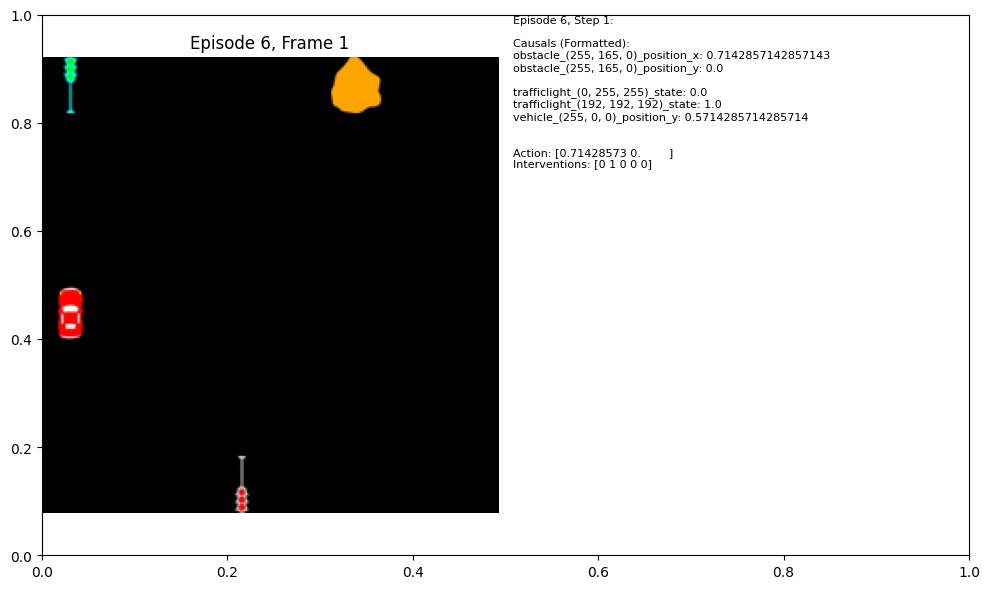

{'obstacle_(255, 165, 0)_position_x': 0.7142857142857143, 'obstacle_(255, 165, 0)_position_y': 0.14285714285714285, 'trafficlight_(0, 255, 255)_state': 0.0, 'trafficlight_(192, 192, 192)_state': 1.0, 'vehicle_(255, 0, 0)_position_y': 0.42857142857142855}


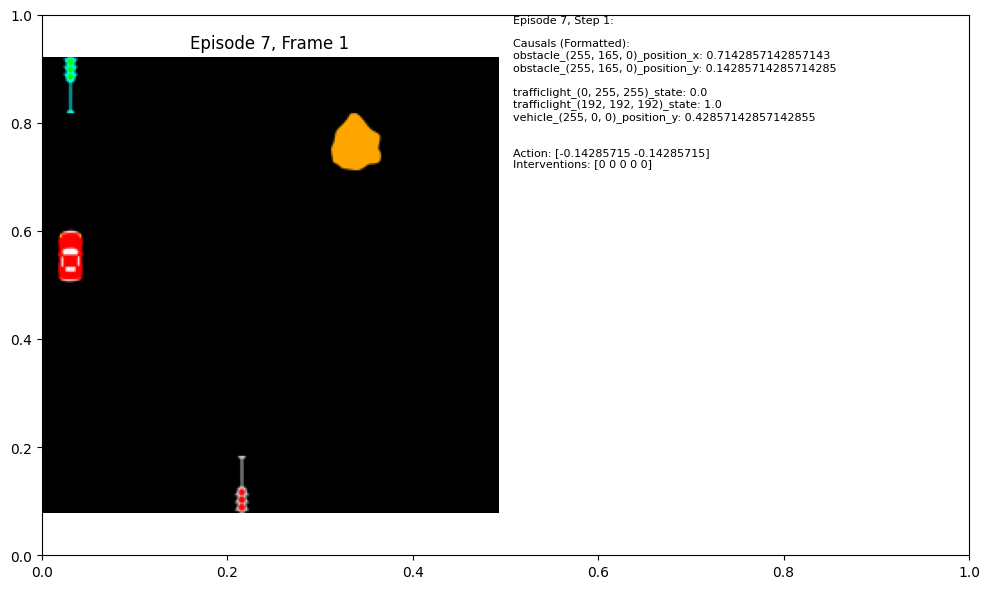

{'obstacle_(255, 165, 0)_position_x': 0.7142857142857143, 'obstacle_(255, 165, 0)_position_y': 0.14285714285714285, 'trafficlight_(0, 255, 255)_state': 0.0, 'trafficlight_(192, 192, 192)_state': 1.0, 'vehicle_(255, 0, 0)_position_y': 0.2857142857142857}


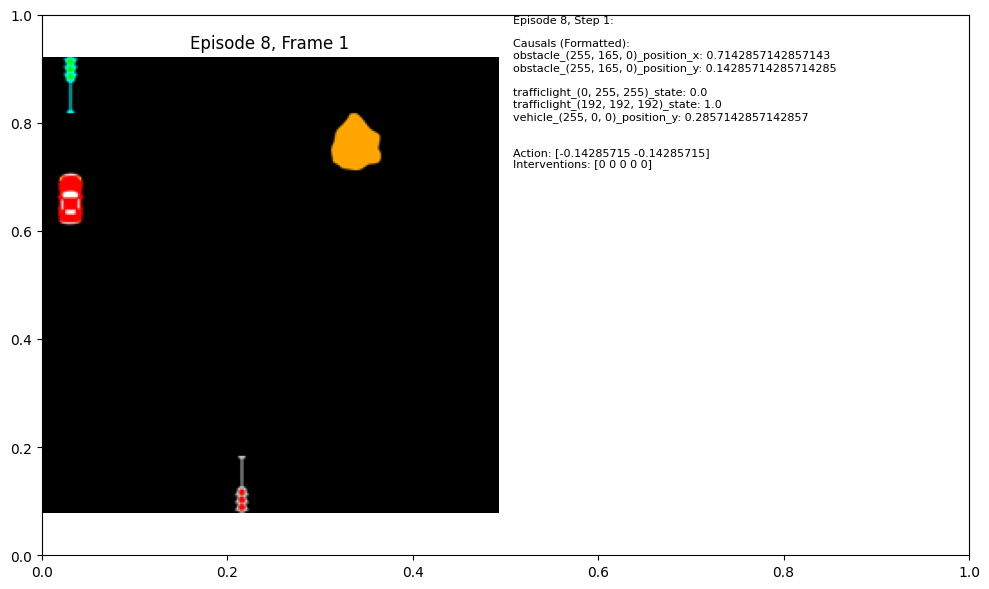

{'obstacle_(255, 165, 0)_position_x': 0.7142857142857143, 'obstacle_(255, 165, 0)_position_y': 0.14285714285714285, 'trafficlight_(0, 255, 255)_state': 0.0, 'trafficlight_(192, 192, 192)_state': 1.0, 'vehicle_(255, 0, 0)_position_y': 0.14285714285714285}


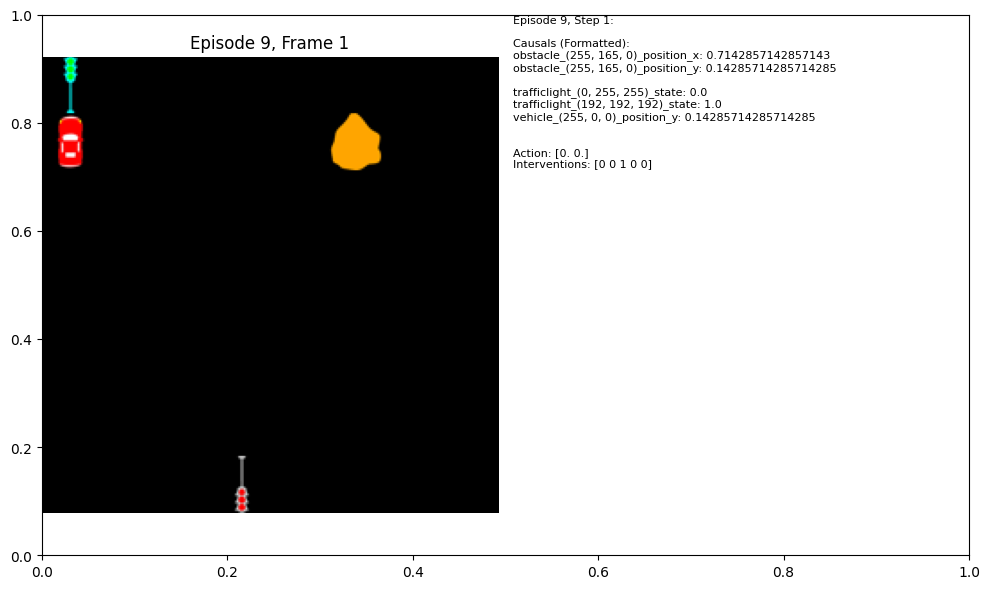

{'obstacle_(255, 165, 0)_position_x': 0.7142857142857143, 'obstacle_(255, 165, 0)_position_y': 0.14285714285714285, 'trafficlight_(0, 255, 255)_state': 1.0, 'trafficlight_(192, 192, 192)_state': 1.0, 'vehicle_(255, 0, 0)_position_y': 0.14285714285714285}


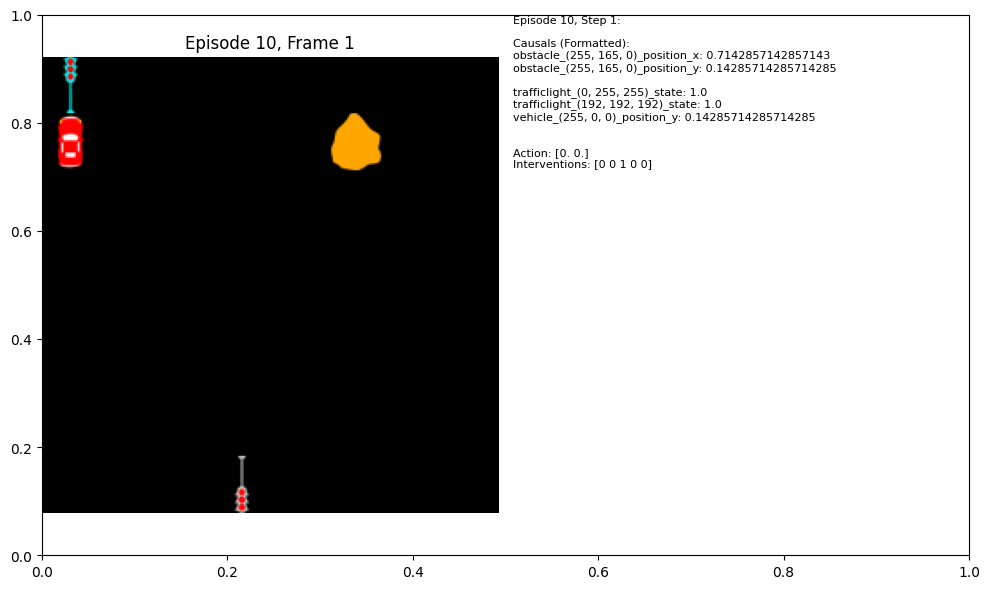

{'obstacle_(255, 165, 0)_position_x': 0.7142857142857143, 'obstacle_(255, 165, 0)_position_y': 0.14285714285714285, 'trafficlight_(0, 255, 255)_state': 0.0, 'trafficlight_(192, 192, 192)_state': 1.0, 'vehicle_(255, 0, 0)_position_y': 0.14285714285714285}


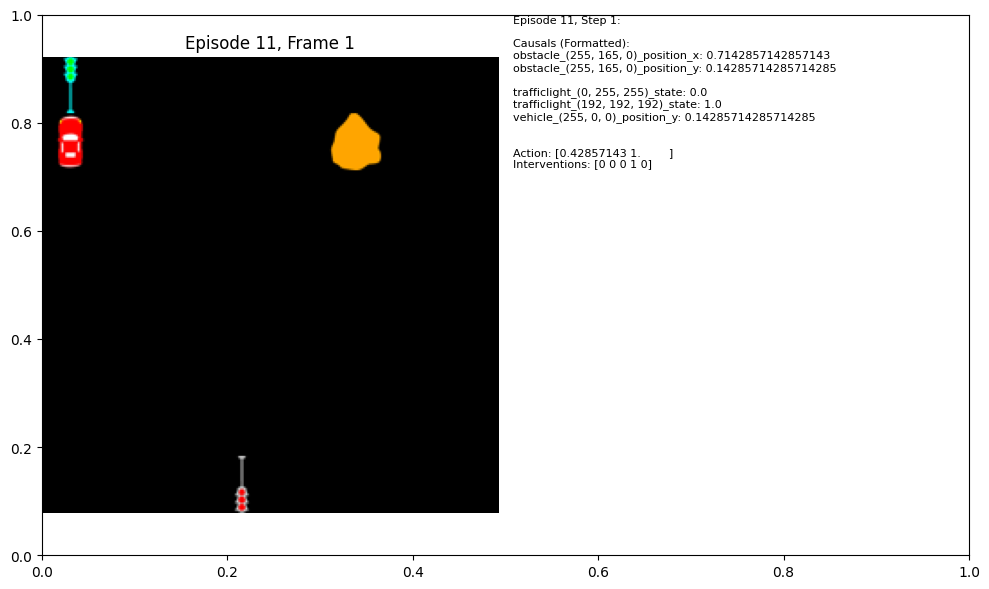

{'obstacle_(255, 165, 0)_position_x': 0.7142857142857143, 'obstacle_(255, 165, 0)_position_y': 0.14285714285714285, 'trafficlight_(0, 255, 255)_state': 0.0, 'trafficlight_(192, 192, 192)_state': 0.0, 'vehicle_(255, 0, 0)_position_y': 0.14285714285714285}


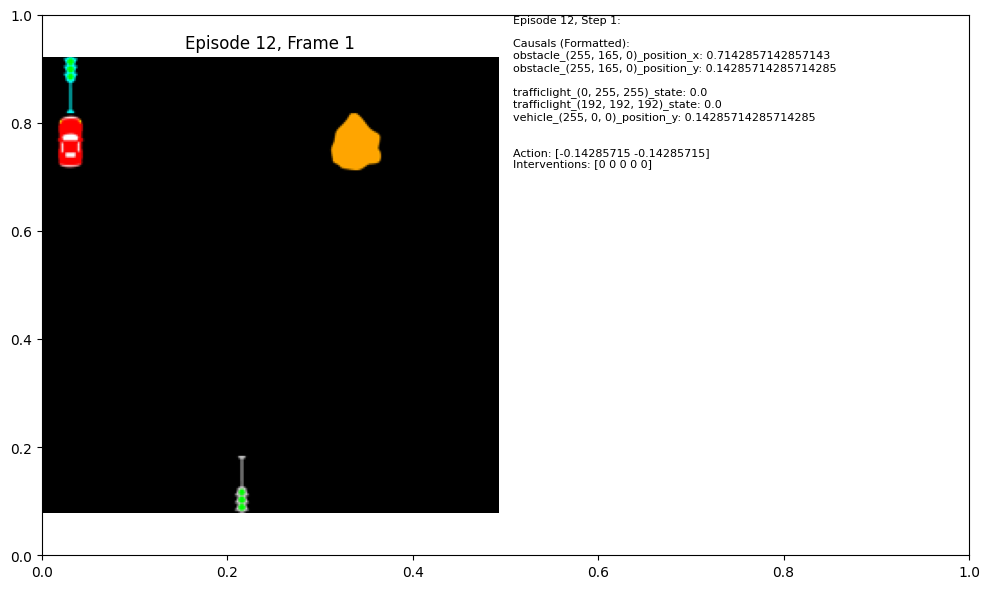

{'obstacle_(255, 165, 0)_position_x': 0.7142857142857143, 'obstacle_(255, 165, 0)_position_y': 0.14285714285714285, 'trafficlight_(0, 255, 255)_state': 0.0, 'trafficlight_(192, 192, 192)_state': 0.0, 'vehicle_(255, 0, 0)_position_y': 0.14285714285714285}


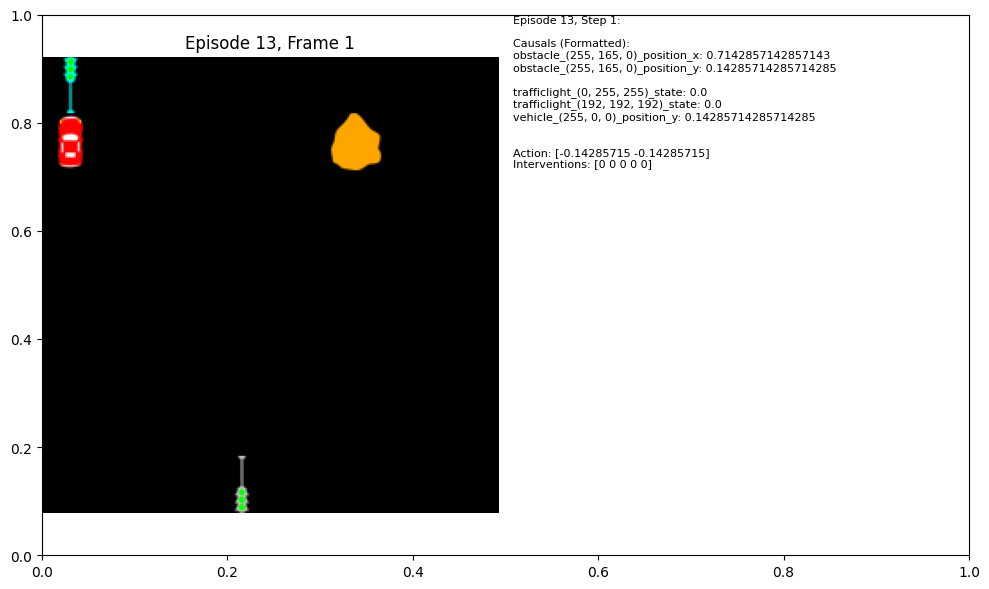

{'obstacle_(255, 165, 0)_position_x': 0.7142857142857143, 'obstacle_(255, 165, 0)_position_y': 0.14285714285714285, 'trafficlight_(0, 255, 255)_state': 0.0, 'trafficlight_(192, 192, 192)_state': 0.0, 'vehicle_(255, 0, 0)_position_y': 0.14285714285714285}


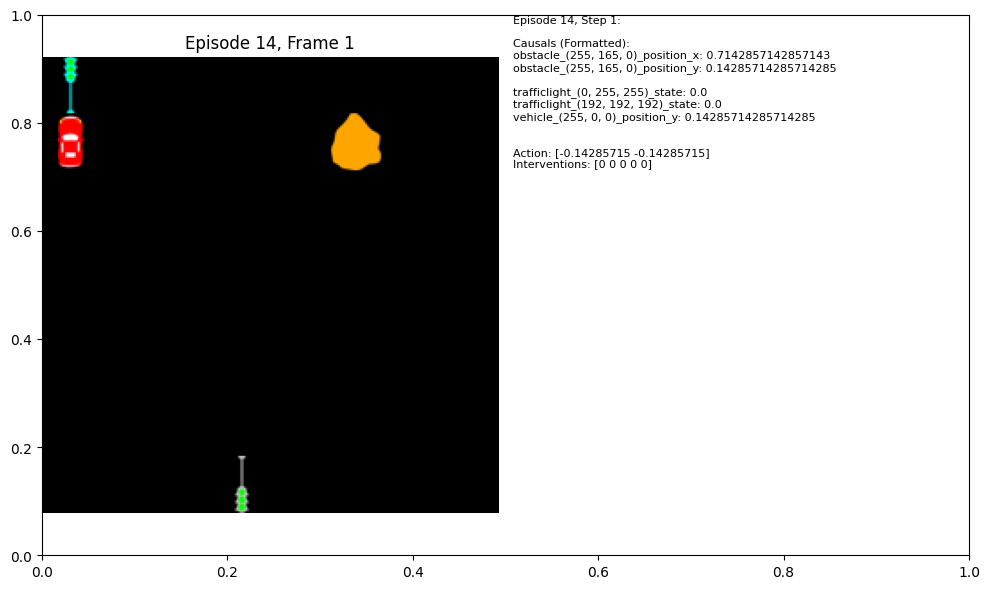

{'obstacle_(255, 165, 0)_position_x': 0.7142857142857143, 'obstacle_(255, 165, 0)_position_y': 0.14285714285714285, 'trafficlight_(0, 255, 255)_state': 0.0, 'trafficlight_(192, 192, 192)_state': 0.0, 'vehicle_(255, 0, 0)_position_y': 0.14285714285714285}


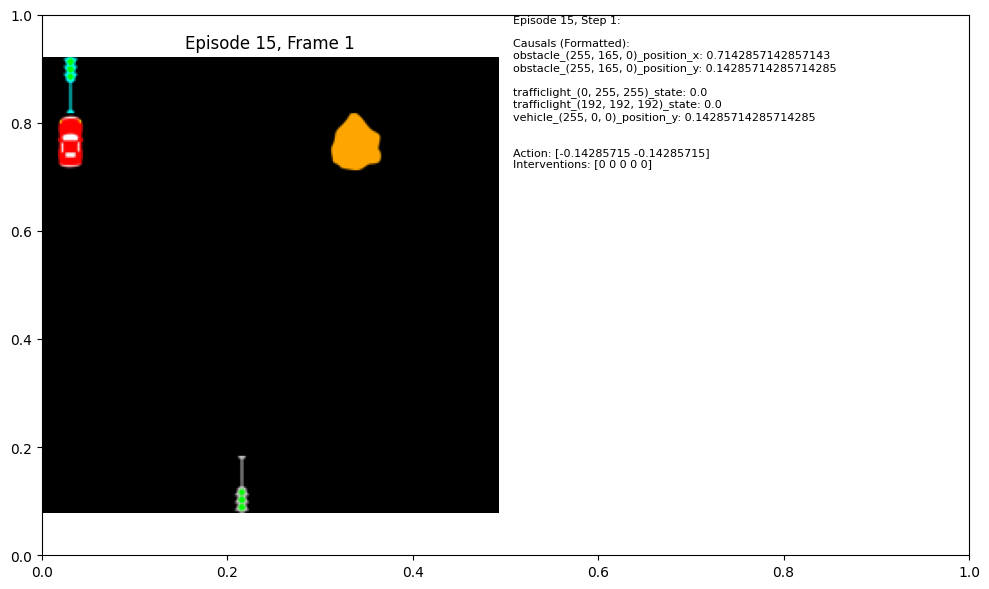

{'obstacle_(255, 165, 0)_position_x': 0.7142857142857143, 'obstacle_(255, 165, 0)_position_y': 0.14285714285714285, 'trafficlight_(0, 255, 255)_state': 0.0, 'trafficlight_(192, 192, 192)_state': 0.0, 'vehicle_(255, 0, 0)_position_y': 0.14285714285714285}


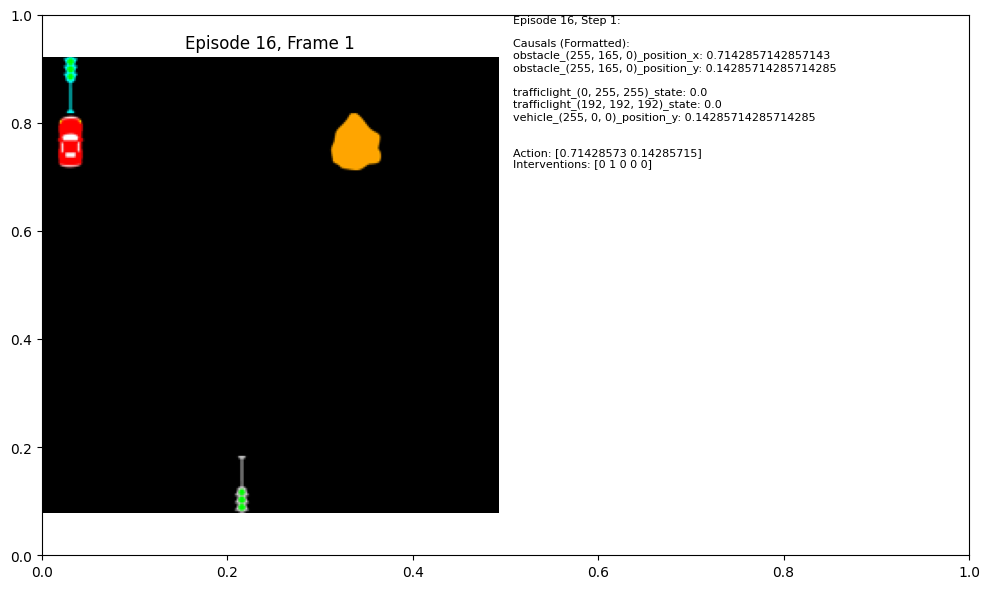

{'obstacle_(255, 165, 0)_position_x': 0.7142857142857143, 'obstacle_(255, 165, 0)_position_y': 0.0, 'trafficlight_(0, 255, 255)_state': 0.0, 'trafficlight_(192, 192, 192)_state': 0.0, 'vehicle_(255, 0, 0)_position_y': 0.14285714285714285}


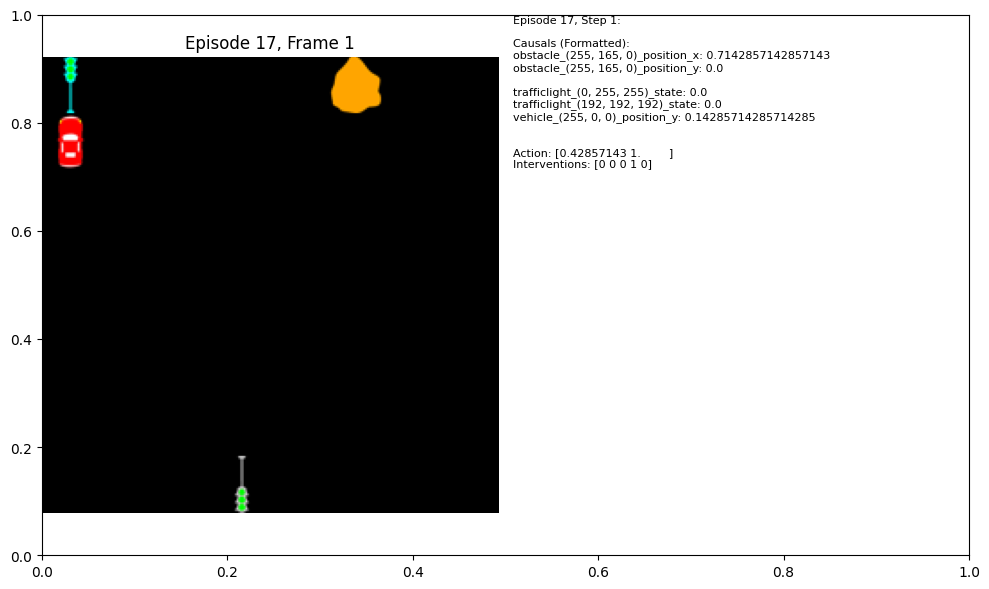

{'obstacle_(255, 165, 0)_position_x': 0.7142857142857143, 'obstacle_(255, 165, 0)_position_y': 0.0, 'trafficlight_(0, 255, 255)_state': 0.0, 'trafficlight_(192, 192, 192)_state': 1.0, 'vehicle_(255, 0, 0)_position_y': 0.14285714285714285}


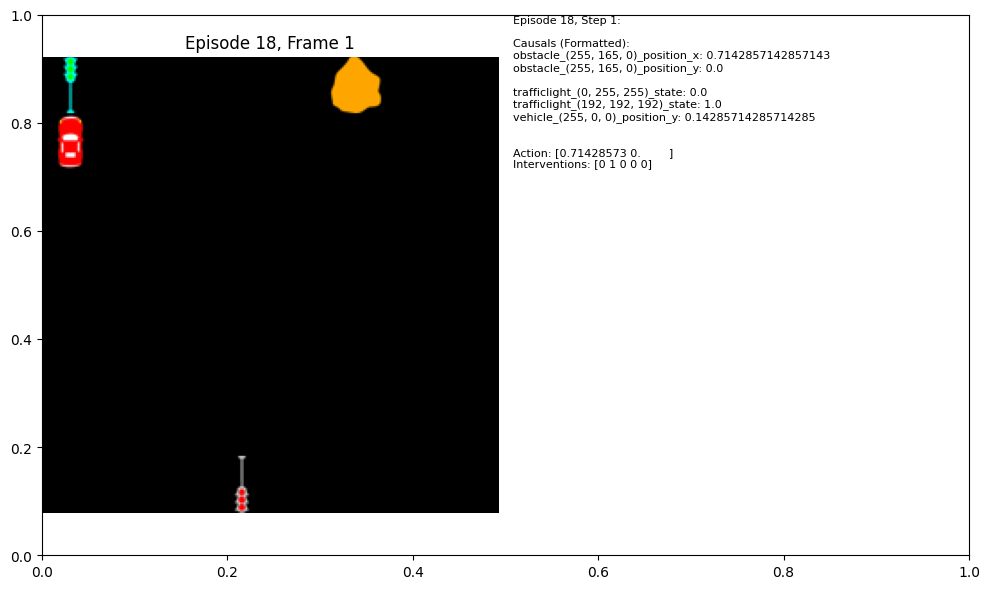

{'obstacle_(255, 165, 0)_position_x': 0.7142857142857143, 'obstacle_(255, 165, 0)_position_y': 0.0, 'trafficlight_(0, 255, 255)_state': 0.0, 'trafficlight_(192, 192, 192)_state': 1.0, 'vehicle_(255, 0, 0)_position_y': 0.14285714285714285}


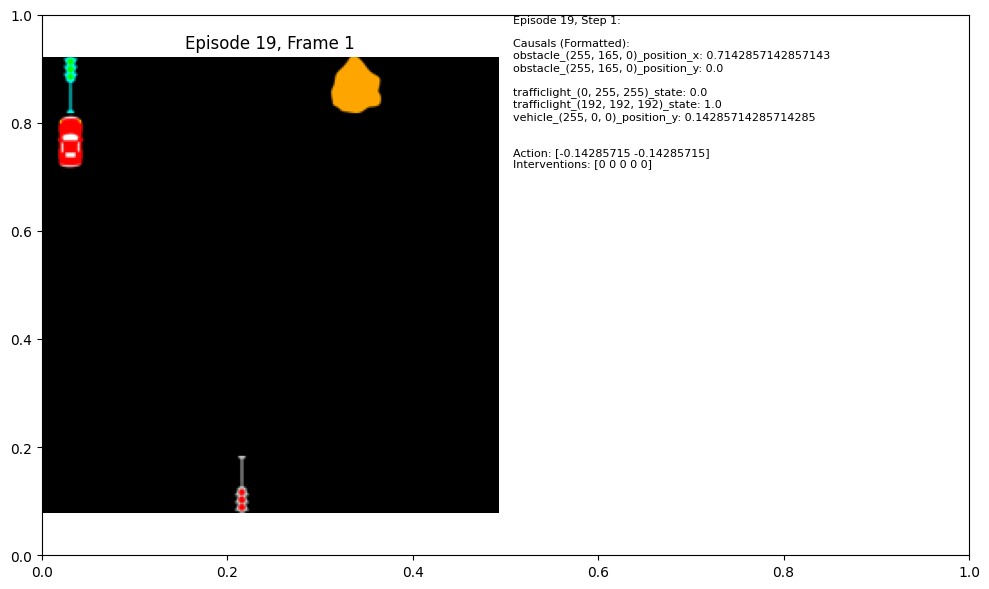

{'obstacle_(255, 165, 0)_position_x': 0.5714285714285714, 'obstacle_(255, 165, 0)_position_y': 0.0, 'trafficlight_(0, 255, 255)_state': 1.0, 'trafficlight_(192, 192, 192)_state': 1.0, 'vehicle_(255, 0, 0)_position_y': 0.7142857142857143}


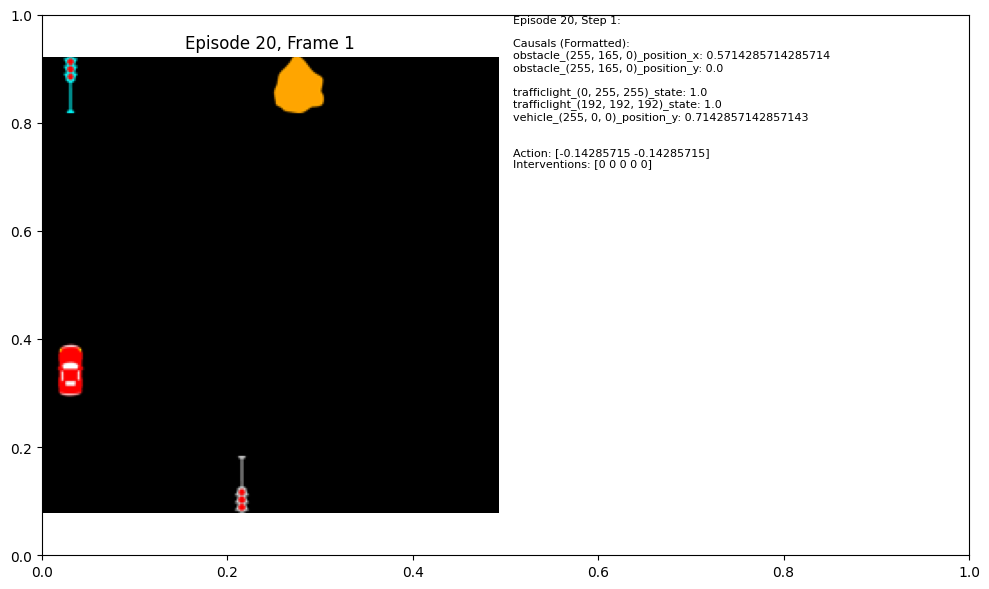

In [10]:
import matplotlib.pyplot as plt
from PIL import Image
import json
# Assume Gridworld, format_causal_dict, and the dataset class are defined elsewhere

def visualize_episodes(dataset, causal_keys, N=1):
    for episode_idx in range(min(N, len(dataset))):  # Loop through N episodes or the total dataset length
        frame_seq = dataset[episode_idx]  # Get the episode data
        frames, actions, interventions, causals = frame_seq
        
        for i in range(frames.shape[0] - 1):  # Iterate through each step, excluding the last frame
            # Map causals to keys for the current frame
            debug_causals = dict(zip(causal_keys, causals[i]))
            print(debug_causals)
            formatted_causals = format_causal_dict(debug_causals)

            fig, ax = plt.subplots(figsize=(10, 6))
            ax1 = plt.subplot(1, 2, 1)  # Frame subplot
            # Adjust image normalization if necessary
            img = (frames[i].permute(1, 2, 0).cpu().numpy() + 1.0) / 2.0  # Normalize if required
            ax1.imshow(img)
            ax1.set_title(f"Episode {episode_idx + 1}, Frame {i + 1}")
            ax1.axis('off')

            ax2 = plt.subplot(1, 2, 2)  # Textual information subplot
            ax2.axis('off')
            text_info = (
                f"Episode {episode_idx + 1}, Step {i + 1}:\n\n"
                f"Causals (Formatted):\n{formatted_causals}\n"
                f"Action: {actions[i]}\n"
                f"Interventions: {interventions[i]}"
            )
            ax2.text(0, 1, text_info, ha='left', va='top', fontsize=8, wrap=True)

            plt.tight_layout()
            plt.show()

# Example usage:
causal_keys = json.load(open('/home/john/PhD/BISCUIT/data/gridworld_simplified_5c/train_metadata.json'))['flattened_causals']
# Assuming train_seq_dataset is defined and loaded
visualize_episodes(train_seq_dataset, causal_keys, N=20)



In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def show_img(imgs: Any,
             figure_title: str = None,
             titles: Optional[list] = None):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axes = plt.subplots(1, len(imgs), figsize=(len(imgs) * 3.5, 3.5))
    if len(imgs) == 1:
        axes = [axes]
    for i, ax in enumerate(axes):
        if len(imgs[i].shape) == 3 and imgs[i].shape[0] in [3,4]:
            imgs[i] = imgs[i].permute(1, 2, 0)
        if isinstance(imgs[i], torch.Tensor):
            imgs[i] = imgs[i].detach().cpu().numpy()
        ax.imshow(imgs[i])
        ax.axis('off')
        if titles is not None and i < len(titles):
            ax.set_title(titles[i], weight='bold')
    if figure_title is not None:
        fig.suptitle(figure_title, weight='bold', size=16)
    plt.tight_layout()
    plt.show()

def create_exclamation_mark_image(size=256, background_color=(1, 1, 1), mark_color=(1, 0, 0), mark_thickness=10, mark_height=100, dot_radius=10):
    """
    Creates an image with a red exclamation mark in the center on a white background.

    Parameters:
    - size (int): The size of the image (width and height). Default is 256.
    - background_color (tuple): The RGB color of the background in the range 0 to 1. Default is white.
    - mark_color (tuple): The RGB color of the exclamation mark in the range 0 to 1. Default is red.
    - mark_thickness (int): The thickness of the line part of the exclamation mark. Default is 10.
    - mark_height (int): The height of the line part of the exclamation mark. Default is 100.
    - dot_radius (int): The radius of the dot part of the exclamation mark. Default is 10.

    Returns:
    - numpy.ndarray: The generated image as a NumPy array.
    """
    # Create a size x size x 3 array with the background color
    image = np.ones((size, size, 3)) * np.array(background_color)

    # Define the center position
    center_x, center_y = size // 2, size // 2

    # Draw the line part of the exclamation mark
    for x in range(center_x - mark_thickness // 2, center_x + mark_thickness // 2):
        for y in range(center_y - mark_height // 2, center_y + mark_height // 2 - dot_radius * 2):
            image[y, x] = mark_color

    # Draw the dot part of the exclamation mark
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            if (x - center_x) ** 2 + (y - (center_y + mark_height // 2 + dot_radius)) ** 2 <= dot_radius ** 2:
                image[y, x] = mark_color

    return image


@torch.no_grad()
def next_step_prediction(
        model: BISCUITNF,
        image: torch.Tensor,
        action: torch.Tensor,
        gt_image: torch.Tensor = torch.zeros(1),
        latents: Optional[torch.Tensor] = None,
        plot_images: bool = True,
        intv_targets: Optional[torch.Tensor] = None,
        text: Optional[str] = None,
        tokenizer: Optional[Any] = None,
        text_only: bool = False,
        tokenized_description=None,
        N: int = 8
    ) -> Tuple[torch.Tensor, torch.Tensor]:
    if latents is None:
        input_image = (image * 2.0) - 1.0
        latents = model.autoencoder.encoder(input_image[None])
        latents, _ = model.flow.forward(latents)
    # tokenized_description = None
    if text is not None:
        tokenized_description = tokenizer(text, return_token_type_ids=True, padding='max_length', max_length=64)
        input_ids = torch.tensor(tokenized_description['input_ids']).to(device)
        token_type_ids = torch.tensor(tokenized_description['token_type_ids']).to(device)
        attention_mask = torch.tensor(tokenized_description['attention_mask']).to(device)
        tokenized_description = {'input_ids': input_ids, 'token_type_ids': token_type_ids, 'attention_mask': attention_mask}    
    new_latents, _ = model.prior_t1.sample(latents, action[None], num_samples=1, intv_targets=intv_targets, tokenized_description=tokenized_description)
    new_latents = new_latents.squeeze(1)
    new_encodings = model.flow.reverse(new_latents)
    new_image = model.autoencoder.decoder(new_encodings)[0]
    new_image = (new_image + 1.0) / 2.0
    if plot_images:
        gt_diff_flag = False
        new_image_frame = new_image.permute(1, 2, 0).cpu().numpy()
        if latents is None:
            old_image_frame = (image.permute(1, 2, 0).cpu().numpy() + 1.0) / 2.0
        else:
            old_image_frame = image.permute(1, 2, 0).cpu().numpy()
        clicked_image_frame = np.copy(old_image_frame)
        ground_truth_image_frame = (gt_image.permute(1, 2, 0).cpu().numpy() + 1.0) / 2.0
        difference = np.abs(new_image_frame - ground_truth_image_frame)
        print(f"Mean absolute difference between the new image and the ground truth: {difference.mean()}")
        if difference.mean() > 0.001:
            print("The new image is not close to the ground truth")
            gt_diff_flag = True
            exclamation_mark_image = create_exclamation_mark_image()
        if action.ndim == 1:
            action = action[None]
        for i in range(action.shape[0]):
            if torch.any(action < 0) or torch.any(action > 1):
                continue
            # Correct calculation for pixel positions considering the normalized action coordinates
            pixel_x = int(action[i, 0].item() * (image.shape[-1] - 1))
            pixel_y = int(action[i, 1].item() * (image.shape[-2] - 1))
            # Highlight the click location with a red color
            clicked_image_frame[max(0, pixel_y-5):pixel_y+6, 
                                max(0, pixel_x-5):pixel_x+6, 
                                :] = np.array([1.0, 1.0, 1.0])
        if torch.any(gt_image != 0):
            image_list = [old_image_frame, clicked_image_frame, new_image_frame, ground_truth_image_frame]
            image_titles = ['Previous Frame', 'Click Location', 'New Sample', 'Ground Truth']
            if gt_diff_flag:
                image_list.append(exclamation_mark_image)
                image_titles.append('Difference')
            show_img(image_list,
                     figure_title=f'Performing action {(action if action.ndim == 1 else action[0]).squeeze().cpu().numpy()}',
                     titles=image_titles)
        else:
            show_img([old_image_frame, clicked_image_frame, new_image_frame],
                    figure_title=f'Performing action {(action if action.ndim == 1 else action[0]).squeeze().cpu().numpy()}',
                    titles=['Previous Frame', 'Click Location', 'New Sample'])
    return new_image, new_latents




In [ ]:
val_dataset = GridworldDataset(
	data_folder=data_folder, split='val_indep', return_targets=False, single_image=True, return_latents=True, triplet=False, seq_len=2, cluster=False, return_text=False, subsample_percentage=1.0,)
for elem in val_dataset:
    print(elem[0].shape)

In [ ]:
from experiments.datasets import GridworldDataset
data_folder = '/home/john/PhD/BISCUIT/data/gridworld_simplified_5c'
# val_seq_dataset = GridworldDataset(
# data_folder=data_folder, split='val', return_targets=True, return_robot_state=True, single_image=False, triplet=False, seq_len=2, cluster=False, return_text=False, subsample_percentage=0.01)
test_seq_dataset = GridworldDataset(
        data_folder=data_folder, split='train', return_targets=True, return_latents=True, single_image=False, triplet=False, seq_len=2, cluster=False, return_text=True, subsample_percentage=0.01)
val_indep_dataset = GridworldDataset(
         data_folder=data_folder, split='val_indep', return_targets=True, single_image=True, return_latents=True, triplet=False, seq_len=1, cluster=False, return_text=True, subsample_percentage=0.01)

In [ ]:
from transformers import AutoTokenizer
model_name = 'sentence-transformers/all-MiniLM-L6-v2'
tokenizer = AutoTokenizer.from_pretrained(model_name)
test_elem = test_seq_dataset[0]
input_ids, token_type_ids, attention_mask = test_elem[-4:-1]
tokenizer.decode(input_ids, skip_special_tokens=True)

In [ ]:
import torch

def reverseEnum(data: list):
    for i in range(len(data)-1, -1, -1):
        yield (i, data[i])

for i, frame_seq in enumerate(test_seq_dataset):
        print(i)
        action = torch.tensor(frame_seq[1]).to(device).squeeze()
        interventions = torch.tensor(frame_seq[2]).to(device)
        causals = torch.tensor(frame_seq[3]).to(device)
        tokenized_description = {'input_ids': torch.tensor(frame_seq[3]).to(device), 'token_type_ids': torch.tensor(frame_seq[4]).to(device), 'attention_mask': torch.tensor(frame_seq[5]).to(device)}
        print(causals)
        print(interventions)
        # intv_targets = torch.tensor(frame_seq[2]).to(device)
        intv_targets = None
        plot_images = True
        new_image, new_latents = next_step_prediction(model, frame_seq[0][0], action, gt_image=frame_seq[0][1], plot_images=plot_images, intv_targets=intv_targets, tokenized_description=tokenized_description, text_only=False, N=1)

In [ ]:
test_seq_dataset[94][1]

In [ ]:
idx = 0
frame1 = test_seq_dataset[idx][0][0]
frame2 = test_seq_dataset[idx][0][1]
tokenized_description = {'input_ids': torch.tensor(test_seq_dataset[idx][3]).to(device), 'token_type_ids': torch.tensor(test_seq_dataset[idx][4]).to(device), 'attention_mask': torch.tensor(test_seq_dataset[idx][5]).to(device)}
zdt = model.flow(model.autoencoder.encoder(frame1[None]))
zdtplus1 = model.flow(model.autoencoder.encoder(frame2[None]))
zdtplus1prior = model.prior_t1.sample(zdt[0], action=torch.tensor(test_seq_dataset[94][1]).to(device), num_samples=1, intv_targets=None, tokenized_description=tokenized_description)
print(zdt)
print(zdtplus1)
zdtplus1flow = model.flow.reverse(zdtplus1[0])
zdtplus1flow = model.autoencoder.decoder(zdtplus1flow)
zdtplus1flow = (zdtplus1flow + 1) / 2
zdtplus1prior_ = model.flow.reverse(zdtplus1prior[0])
zdtplus1prior_ = model.autoencoder.decoder(zdtplus1prior_)
zdtplus1prior_ = (zdtplus1prior_ + 1) / 2
from matplotlib import pyplot as plt
# plt.imshow(zt.squeeze().cpu().detach().numpy().transpose(1, 2, 0))
# plt.imshow(zdtplus1prior_.squeeze().cpu().detach().numpy().transpose(1, 2, 0))
plt.imshow(zdtplus1flow.squeeze().cpu().detach().numpy().transpose(1, 2, 0))

In [ ]:
zdtplus1prior[0] - zdtplus1[0]

In [ ]:
for i, frame_seq in enumerate(val_seq_dataset):
    # Stack the images at each step to form a sequence
    frames, actions = frame_seq
    frames = frames.to(device)
    actions = torch.from_numpy(actions).to(device)
    # interventions = interventions.to(device)
    # causals = causals.to(device)
    # Perform the next step prediction
    new_image, new_latents = next_step_prediction(frames[0], actions, gt_image=frames[1], intv_targets=None, plot_images=True)
    


In [ ]:
%matplotlib ipympl

latents = None
image = test_seq_dataset[0][0][0]

fig, ax = plt.subplots()
ax.imshow(image.permute(1, 2, 0).cpu().numpy())
load_text = ax.text(image.shape[-1]//2, 
                image.shape[-2]//2, 
                'Loading...', 
                fontsize='x-large',
                weight='bold',
                va='center',
                ha='center',
                backgroundcolor=(1.0, 0.8, 0.8))
load_text.set_visible(False)
ax.axis('off')

def onclick(event):
    print('click')
    global image, latents
    load_text.set_visible(True)
    fig.canvas.draw()
    ix, iy = event.xdata, event.ydata
    # ix = (ix / image.shape[-1] - 0.5) * 2.0
    # iy = (iy / image.shape[-2] - 0.5) * 2.0
    print(f'Clicked at x={ix}, y={iy}')
    image, latents = next_step_prediction(model, image=image,
                                            action=torch.tensor([iy, ix], 
                                                                    dtype=torch.float32,
                                                                    device=device),
                                            latents=latents,
                                            plot_images=False)
    ax.imshow(image.permute(1, 2, 0).cpu().numpy())
    load_text.set_visible(False)
    fig.canvas.draw()

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [ ]:
image = test_seq_dataset[5][0][0]
latents = None
action_sequence = [
    (0.42857143, 1.),
    (0., 0.),
    (-0.14285714, -0.14285714),
    (0.42857143, 1.),
    (0., 0.),
]

for i, action in enumerate(action_sequence):
    image, latents = next_step_prediction(model,
                                          image=image, 
                                          action=torch.tensor(action, device=device), 
                                          latents=latents,
                                          gt_image=test_seq_dataset[5][0][1],
                                          plot_images=True)

In [ ]:
%matplotlib ipympl
import ipywidgets as widgets
from IPython.display import display
import torch
import matplotlib.pyplot as plt
# from open_clip import get_tokenizer
from transformers import AutoTokenizer
# tokenizer = get_tokenizer('hf-hub:timm/ViT-B-16-SigLIP')
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
action = torch.tensor((-0.14285714, -0.14285714)).to(device)

# Assuming test_seq_dataset, next_step_prediction, and device are defined elsewhere
latents = None
image = test_seq_dataset[0][0][0]


fig, ax = plt.subplots()
ax.imshow(image.permute(1, 2, 0).cpu().numpy())
load_text = ax.text(image.shape[-1]//2, 
                    image.shape[-2]//2, 
                    'Enter action and press "Update"', 
                    fontsize='x-large',
                    weight='bold',
                    va='center',
                    ha='center',
                    backgroundcolor=(1.0, 0.8, 0.8))
load_text.set_visible(True)  # Initially visible to prompt for input
ax.axis('off')

# Text input for action
text_input = widgets.Text(
    value='',
    placeholder='Type action here',
    description='Action:',
    disabled=False
)

# Button to trigger the update
update_button = widgets.Button(
    description='Update',
    disabled=False,
    button_style='',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to update based on action',
    icon='check'  # (FontAwesome names without the `fa-` prefix)
)

def on_update_button_clicked(b):
    global image, latents
    text = text_input.value 
    
    
    print(f'Action: {text}') 

    # Update the image and latents based on the provided action
    image, latents = next_step_prediction(model,
                                          image=image,
                                          action=action,  # Assuming the function now accepts a string
                                          latents=latents,
                                          plot_images=False,
                                          text=text,
                                          tokenizer=tokenizer,
                                          text_only=True)
                                          
    
    # Update the plot with the new image
    ax.clear()  # Clear the previous image
    ax.imshow(image.permute(1, 2, 0).cpu().numpy())
    load_text.set_visible(False)  # Hide the loading text
    ax.axis('off')  # Hide axes again after redrawing
    fig.canvas.draw()  # Refresh the figure

update_button.on_click(on_update_button_clicked)

# Display the widgets
widgets.VBox([text_input, update_button])


In [ ]:
model.prior_t1.text_only

In [ ]:
text = 'You toggled the state of the cyan traffic light'
image, latents = next_step_prediction(model,
					image=image,
					action=torch.tensor(action).to(device),  # Assuming the function now accepts a string
					latents=latents,
					plot_images=False,
					text=text,
					tokenizer=tokenizer,
					text_only=True)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor
from pytorch_lightning.loggers import WandbLogger
import numpy as np
from copy import deepcopy

import sys
sys.path.append('../../')
from models.shared import CosineWarmupScheduler, Encoder, Decoder, visualize_ae_reconstruction, SimpleEncoder, SimpleDecoder
import wandb


class BetaVAE(pl.LightningModule):
    def __init__(self, num_latents, c_in=3, c_hid=64, lr=1e-3, warmup=500, 
                 max_iters=100000, img_width=64, beta=10.0, **kwargs):
        super().__init__()
        self.save_hyperparameters()

        # Select the correct Encoder and Decoder based on image width
        if self.hparams.img_width == 32:
            EncoderClass = SimpleEncoder
            DecoderClass = SimpleDecoder
        else:
            EncoderClass = Encoder
            DecoderClass = Decoder
        use_coordconv = kwargs.get('use_coordconv', False)

        # Initialize variational encoder and decoder
        self.encoder = EncoderClass(num_latents=self.hparams.num_latents,
                                    c_hid=self.hparams.c_hid,
                                    c_in=self.hparams.c_in,
                                    width=self.hparams.img_width,
                                    act_fn=nn.SiLU,
                                    residual=True,
                                    num_blocks=2,
                                    variational=True,
                                    use_coordconv=use_coordconv)
        self.decoder = DecoderClass(num_latents=self.hparams.num_latents,
                                    c_hid=self.hparams.c_hid,
                                    c_out=self.hparams.c_in,
                                    width=self.hparams.img_width,
                                    num_blocks=2,
                                    act_fn=nn.SiLU,
                                    use_coordconv=use_coordconv)

    def forward(self, x):
        z_mean, z_log_std = self.encoder(x)
        z_sample = z_mean + torch.randn_like(z_mean) * z_log_std.exp()
        x_rec = self.decoder(z_sample)
        return x_rec, z_sample, z_mean, z_log_std

    def encode(self, x, random=True):
        z_mean, z_log_std = self.encoder(x)
        if random:
            z_sample = z_mean + torch.randn_like(z_mean) * z_log_std.exp()
        else:
            z_sample = z_mean
        return z_sample

    def _get_loss(self, batch, mode='train'):
        imgs, _ = batch if isinstance(batch, (tuple, list)) else (batch, None)
        x_rec, z_sample, z_mean, z_log_std = self.forward(imgs)
        loss_rec = F.mse_loss(x_rec, imgs)
        kld = kl_divergence(z_mean, z_log_std).sum(dim=1).mean()
        loss = loss_rec + self.hparams.beta * kld
        self.log(f'{mode}_loss', loss)
        self.log(f'{mode}_kld', kld)
        return loss

    def configure_optimizers(self):
        optimizer = optim.AdamW(self.parameters(), lr=self.hparams.lr, weight_decay=0.0)
        lr_scheduler = CosineWarmupScheduler(optimizer,
                                             warmup=self.hparams.warmup,
                                             max_iters=self.hparams.max_iters)
        return [optimizer], [{'scheduler': lr_scheduler, 'interval': 'step'}]

    def training_step(self, batch, batch_idx):
        loss = self._get_loss(batch, mode='train')
        self.log('train_loss', loss)
        return loss

    def validation_step(self, batch, batch_idx):
        loss = self._get_loss(batch, mode='val')
        self.log('val_loss', loss)

    def test_step(self, batch, batch_idx):
        loss = self._get_loss(batch, mode='val')
        self.log('test_loss', loss)

    @staticmethod
    def get_callbacks(exmp_inputs=None, cluster=False, **kwargs):
        img_callback = AELogCallback(exmp_inputs, every_n_epochs=1)
        # Create learning rate callback
        lr_callback = LearningRateMonitor('step')
        return [lr_callback, img_callback]

def kl_divergence(mean1, log_std1, mean2=None, log_std2=None):
    """ Returns the KL divergence between two Gaussian distributions """
    if mean2 is None:
        mean2 = torch.zeros_like(mean1)
    if log_std2 is None:
        log_std2 = torch.zeros_like(log_std1)
    var1, var2 = (2*log_std1).exp(), (2*log_std2).exp()
    KLD = (log_std2 - log_std1) + (var1 + (mean1 - mean2) ** 2) / (2 * var2) - 0.5
    return KLD.sum(dim=1)

class AELogCallback(pl.Callback):
    """ Callback for visualizing predictions """

    def __init__(self, exmp_inputs, every_n_epochs=3, prefix=''):
        super().__init__()
        if isinstance(exmp_inputs, (tuple, list)):
            self.imgs, self.actions = exmp_inputs
        else:
            self.imgs, self.actions = exmp_inputs, None
        self.every_n_epochs = every_n_epochs
        self.prefix = prefix

    def on_train_epoch_end(self, trainer, pl_module):
        def log_fig(tag, fig):
            if isinstance(trainer.logger, WandbLogger):
                fig = wandb.Image(fig)
                trainer.logger.experiment.log({f'{self.prefix}{tag}': fig}, step=trainer.global_step)
            else:
                trainer.logger.experiment.add_image(f'{self.prefix}{tag}', fig, global_step=trainer.global_step, dataformats='HWC')

        if self.imgs is not None and (trainer.current_epoch+1) % self.every_n_epochs == 0:
            images = self.imgs.to(trainer.model.device)
            trainer.model.eval()
            rand_idxs = np.random.permutation(images.shape[0])
            if self.actions is None or pl_module.hparams.action_size <= 0:
                actions = None
            else:
                actions = self.actions.to(trainer.model.device)
            log_fig(f'reconstruction_seq', visualize_ae_reconstruction(trainer.model, images[:8], 
                                                                       actions[:8] if actions is not None else None))
            log_fig(f'reconstruction_rand', visualize_ae_reconstruction(trainer.model, images[rand_idxs[:8]], 
                                                                        actions[rand_idxs[:8]] if actions is not None else None))
            trainer.model.train()

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt 
import seaborn as sns
import networkx as nx
import numpy as np
import torch.nn as nn


@torch.no_grad()
def visualize_vae_reconstruction(model, images):
    """Visualizes reconstructions of a VAE."""
    reconst, *_ = model(images)
    print(f"Input images shape: {images.shape}")
    print(f"Reconstructed images shape: {reconst.shape}")

    # Check if the number of dimensions matches
    if images.dim() != reconst.dim():
        raise ValueError(f"Input and reconstructed images must have the same number of dimensions. Got {images.dim()} and {reconst.dim()}.")

    # Prepare for stacking images and reconstructions vertically in pairs
    batch_size, c, h, w = images.shape
    comparison = torch.zeros(batch_size, c, h, w * 2)  # Allocate space for [B, C, H, 2*W]
    comparison = comparison.to(images.device)  # Ensure the comparison tensor is on the correct device
    
    # Place each original image and its reconstruction side by side
    for i in range(batch_size):
        comparison[i, :, :, :w] = images[i]  # Original image on the left
        comparison[i, :, :, w:] = reconst[i]  # Corresponding reconstruction on the right
    
    # Create grid with each original-reconstruction pair in its own row
    img_grid = torchvision.utils.make_grid(comparison, nrow=1, normalize=True, pad_value=0.25, value_range=(-1, 1))
    img_grid = img_grid.permute(1, 2, 0)
    img_grid = img_grid.cpu().numpy()
    return img_grid



# Initialize the model
model = BetaVAE(num_latents=20, c_in=3, c_hid=64, lr=1e-3, warmup=500, max_iters=100000, img_width=256, beta=10.0).to('cuda')

# Dummy input tensor
x = torch.zeros(10, 3, 256, 256).to('cuda')
x = x.float() / 255.0
x = x * 2.0 - 1.0

# Visualize the reconstruction
img_grid = visualize_vae_reconstruction(model, x)

# Plot the grid
plt.figure(figsize=(8, 8))
plt.imshow(img_grid)
plt.axis('off')
plt.show()


In [85]:
# GPT TESTS
import matplotlib.pyplot as plt
from PIL import Image
import json
import webcolors
from transformers import AutoTokenizer
from open_clip import create_model_from_pretrained, get_tokenizer

def closest_color(requested_color):
    min_colors = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_color[0]) ** 2
        gd = (g_c - requested_color[1]) ** 2
        bd = (b_c - requested_color[2]) ** 2
        min_colors[(rd + gd + bd)] = name
    return min_colors[min(min_colors.keys())]

def get_color_name(rgb_tuple):
    try:
        color_name = webcolors.rgb_to_name(rgb_tuple)
    except ValueError:
        color_name = closest_color(rgb_tuple)
    return color_name



model_name = 'hf-hub:timm/ViT-B-16-SigLIP'
tokenizer = get_tokenizer(model_name)
i = 5
causal_keys = json.load(open('/home/john/PhD/BISCUIT/data/gridworld_simplified_5c/train_metadata.json'))['flattened_causals']
frame_seq = train_seq_dataset[i]
frames, actions, interventions, *action_descriptions, causals = frame_seq
causal_dicts = [dict(zip(causal_keys, causals[i])) for i in range(causals.shape[0])]
for causal_dict in causal_dicts.copy():
    for key, value in list(causal_dict.items()):
        color_name = get_color_name(eval(key.split('_')[1]))
        new_key = key.replace(key.split('_')[1], color_name)
        causal_dict[new_key] = causal_dict.pop(key)
frame1 = (frames[0].permute(1, 2, 0).cpu().numpy() + 1.0) / 2.0
frame2 = (frames[1].permute(1, 2, 0).cpu().numpy() + 1.0) / 2.0
action_description = tokenizer.tokenizer.decode(token_ids=action_descriptions[0], token_type_ids=action_descriptions[1], attention_mask=action_descriptions[2], skip_special_tokens=True)

In [104]:
causal_dicts

[{'obstacle_orange_position_x': 0.7142857142857143,
  'obstacle_orange_position_y': 0.0,
  'trafficlight_cyan_state': 0.0,
  'trafficlight_silver_state': 1.0,
  'vehicle_red_position_y': 0.5714285714285714},
 {'obstacle_orange_position_x': 0.7142857142857143,
  'obstacle_orange_position_y': 0.14285714285714285,
  'trafficlight_cyan_state': 0.0,
  'trafficlight_silver_state': 1.0,
  'vehicle_red_position_y': 0.42857142857142855}]

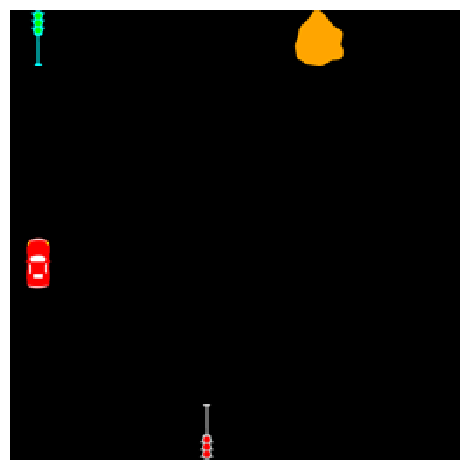

In [100]:
# list(map(get_color_name, [eval(x.split('_')[1]) for x in causal_dicts[0].keys()]))
# Replace the rgb values with the color names in the causal_dicts keys while keeping the rest of the key intact
# i.e., 'obstacle_(255, 165, 0)_position_x' -> 'obstacle_orange_position_x'
plt.imshow(frame1, origin='upper', interpolation='none')
# Remove the axes and the white space around the image
plt.gca().set_axis_off()
# Remove the white space around the image
plt.tight_layout()
plt.show()


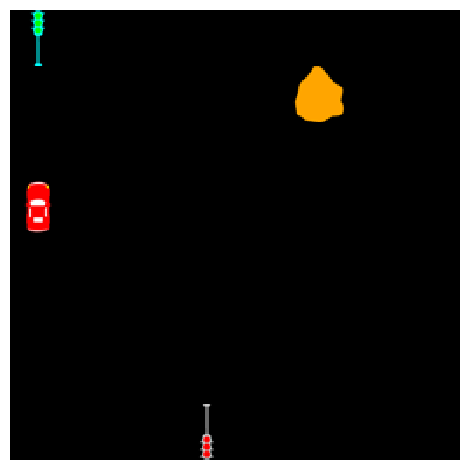

In [101]:
plt.imshow(frame2, origin='upper', interpolation='none')
# Remove the axes and the white space around the image
plt.gca().set_axis_off()
# Remove the white space around the image
plt.tight_layout()
plt.show()